In [1]:
import pandas as pd

### Cargamos las metricas y coeficientes de los modelos

In [2]:
lineal_coefs_df = pd.read_csv(
    '../../datamarts/coeficientes_por_categoria_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

nonlineal_importances_df = pd.read_csv(
    '../../datamarts/impotancia_por_categoria_no_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

metrics_lineal_df = pd.read_csv(
    '../../datamarts/metricas_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

metrics_nonlineal_df = pd.read_csv(
    '../../datamarts/r2_por_categoria_no_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

## Comparativa del modelo lineal y no lineal

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

def compare_coefficients_and_importances_with_r2(
    linear_coefs_df,
    nonlinear_importances_df,
    linear_metrics_df,
    nonlinear_metrics_df,
    top_n=10
):
    results = []

    # Ensure index
    if 'Variable' in linear_coefs_df.columns:
        linear_coefs_df = linear_coefs_df.set_index('Variable')

    targets = nonlinear_importances_df['Target'].unique()

    for target in targets:
        if target not in linear_coefs_df.columns:
            continue

        # Coefficients
        coefs = linear_coefs_df[target].dropna()
        top_coefs = coefs.abs().sort_values(ascending=False).head(top_n)
        top_coef_vars = top_coefs.index
        top_coef_values = coefs[top_coef_vars].values  # keep original signs

        # Importances
        imp_target = nonlinear_importances_df[nonlinear_importances_df['Target'] == target]
        top_importances = imp_target.sort_values(by='Importance', ascending=False).head(top_n)
        top_imp_vars = top_importances['Variable']

        # R²
        r2_linear_val = linear_metrics_df.loc[linear_metrics_df['Gasto'] == target, 'R²']
        r2_linear_str = f"{r2_linear_val.values[0]:.3f}" if not r2_linear_val.empty else "N/A"

        r2_nonlinear_val = nonlinear_metrics_df.loc[nonlinear_metrics_df['Target'] == target, 'R2']
        r2_nonlinear_str = f"{r2_nonlinear_val.values[0]:.3f}" if not r2_nonlinear_val.empty else "N/A"

        # Plot
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))

        # Colors for coefficients: red if positive, blue if negative
        coef_colors = ['red' if v > 0 else 'blue' for v in top_coef_values]

        axs[0].barh(
            top_coef_vars,
            top_coefs.values,
            color=coef_colors
        )
        axs[0].set_title(f'|Coef| - {target}\nR² linear = {r2_linear_str}')
        axs[0].invert_yaxis()
        axs[0].set_xlabel('Absolute Coefficient Value')

        # Colors for importances: all black
        imp_colors = ['black'] * len(top_imp_vars)

        axs[1].barh(
            top_imp_vars,
            top_importances['Importance'].values,
            color=imp_colors
        )
        axs[1].set_title(f'Importance - {target}\nR² nonlinear = {r2_nonlinear_str}')
        axs[1].invert_yaxis()
        axs[1].set_xlabel('Model Importance')

        plt.suptitle(f'Comparison: Coefficients vs Importances - {target}', fontsize=14)
        plt.tight_layout()
        results.append(fig)

    return results


C:\Users\rauul\AppData\Local\Temp\ipykernel_28044\2824030479.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 2, figsize=(15, 6))


[<Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 

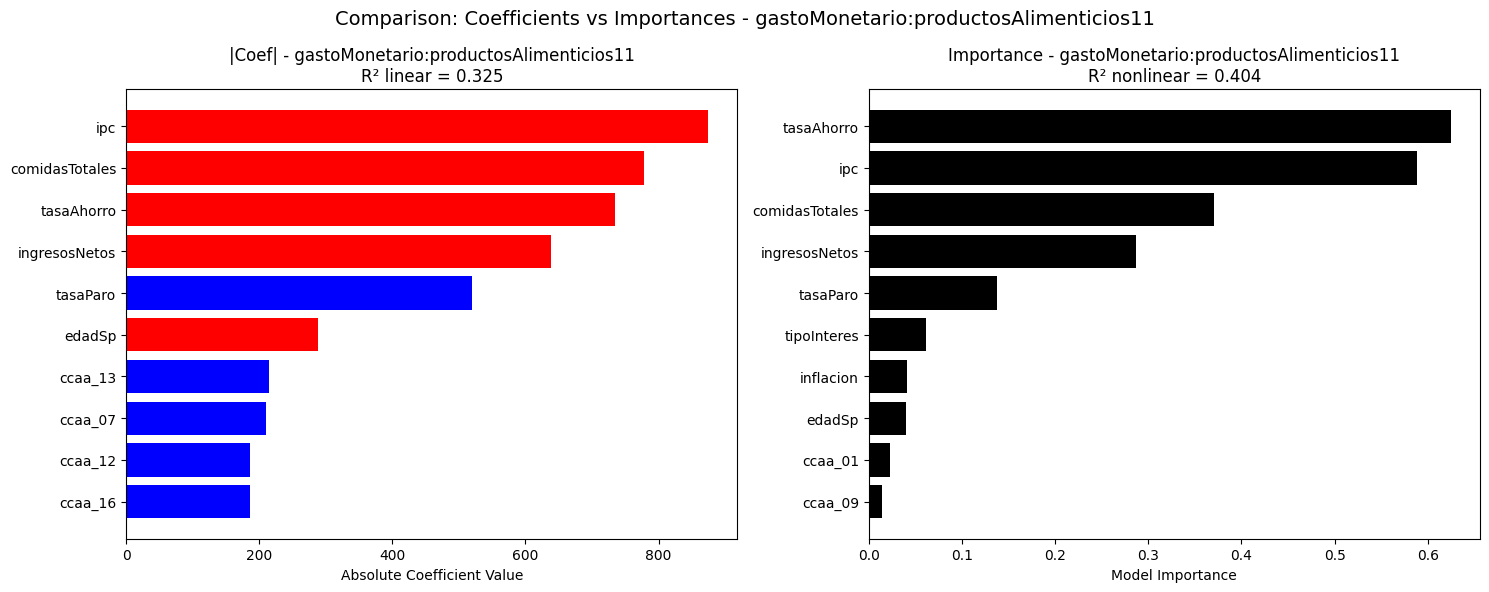

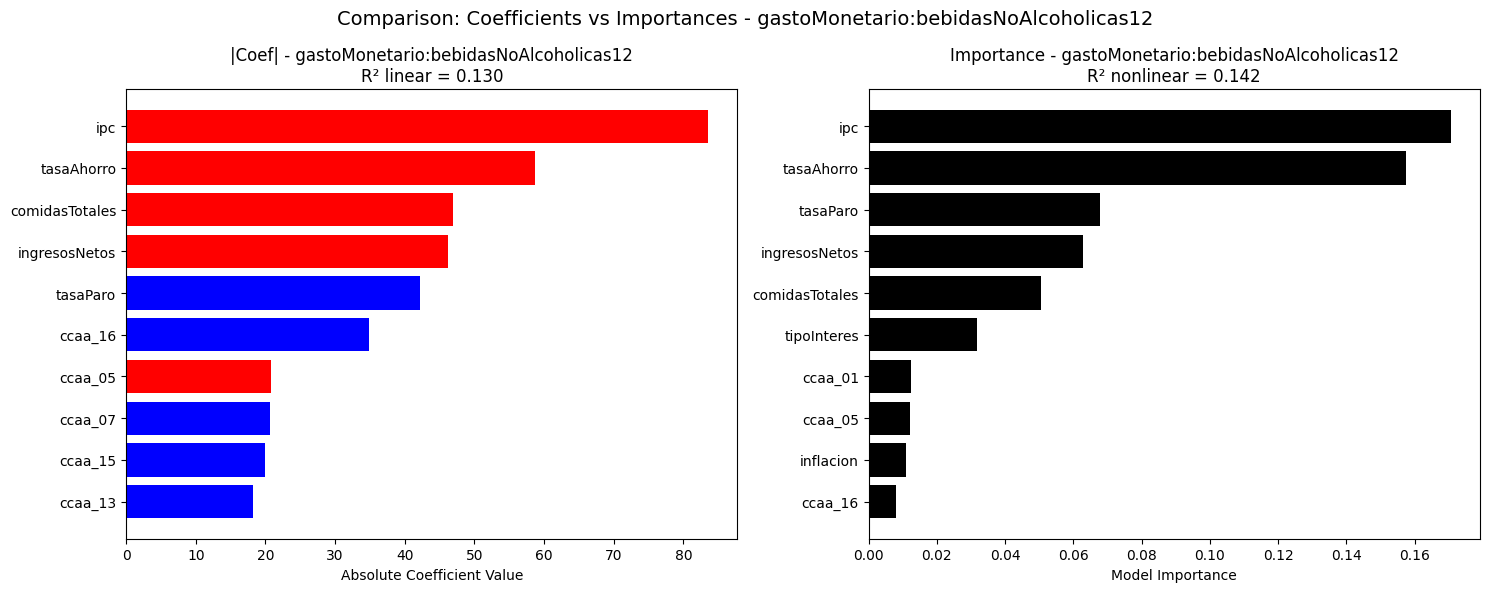

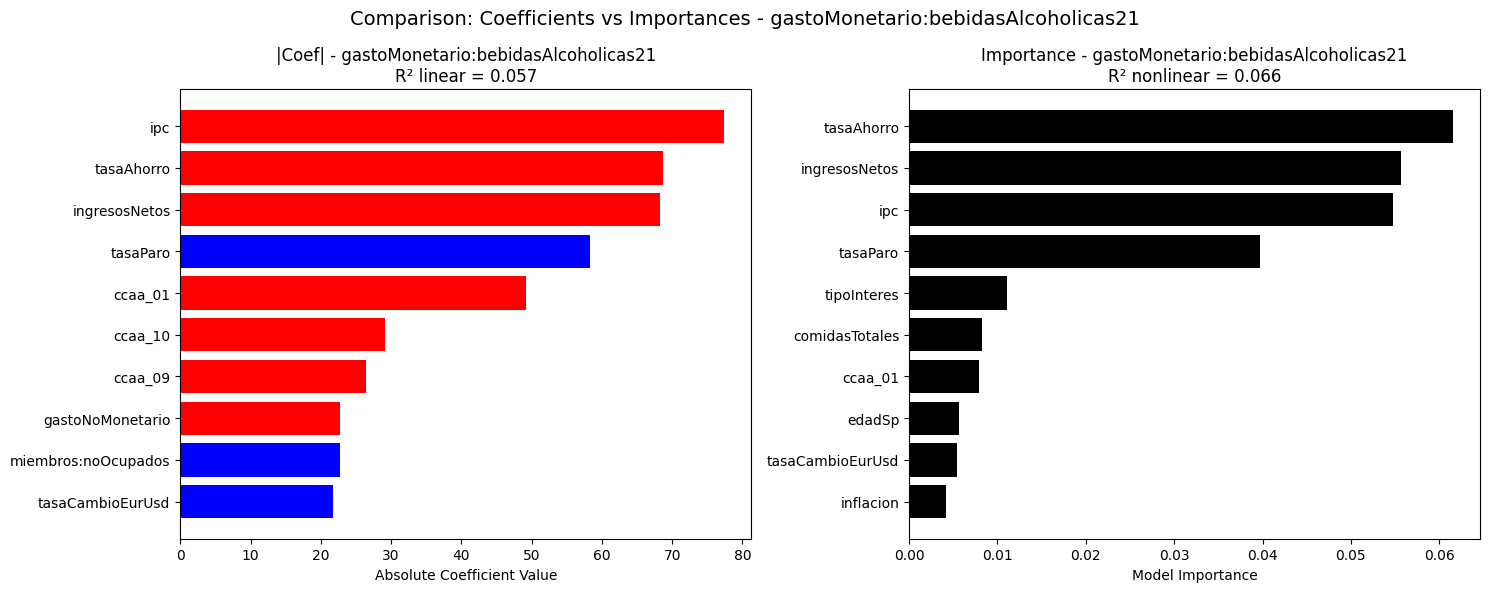

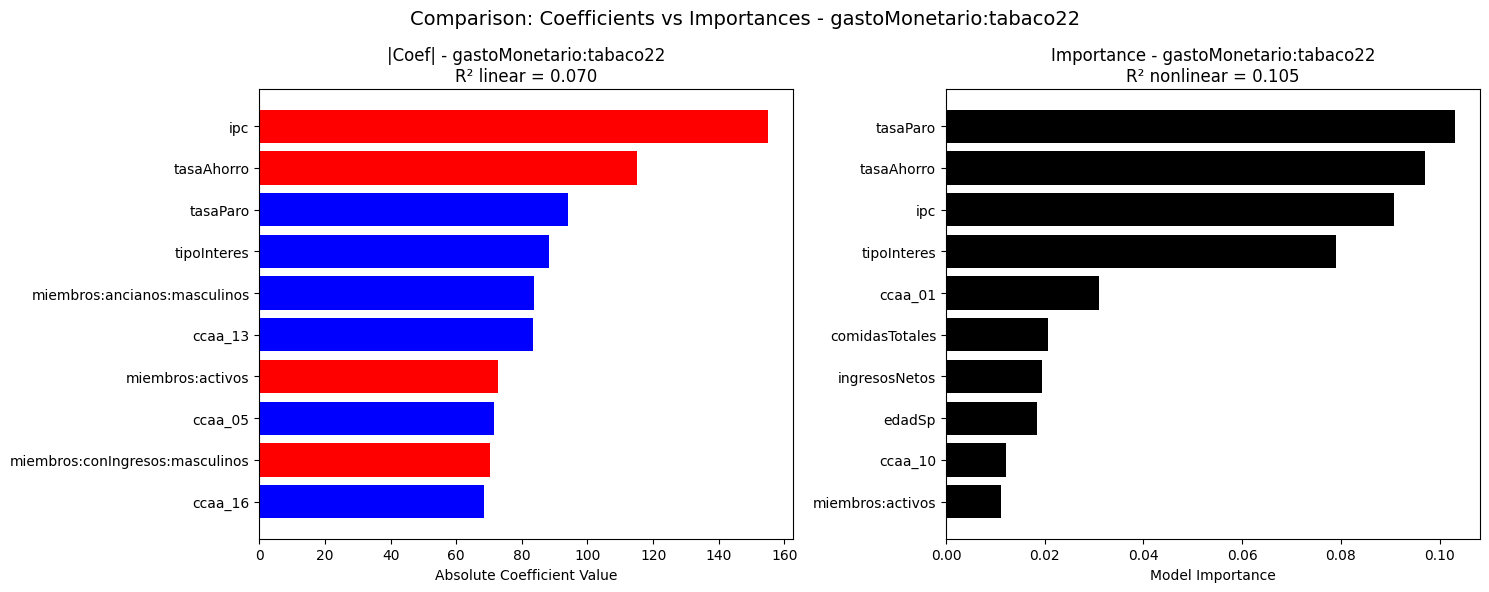

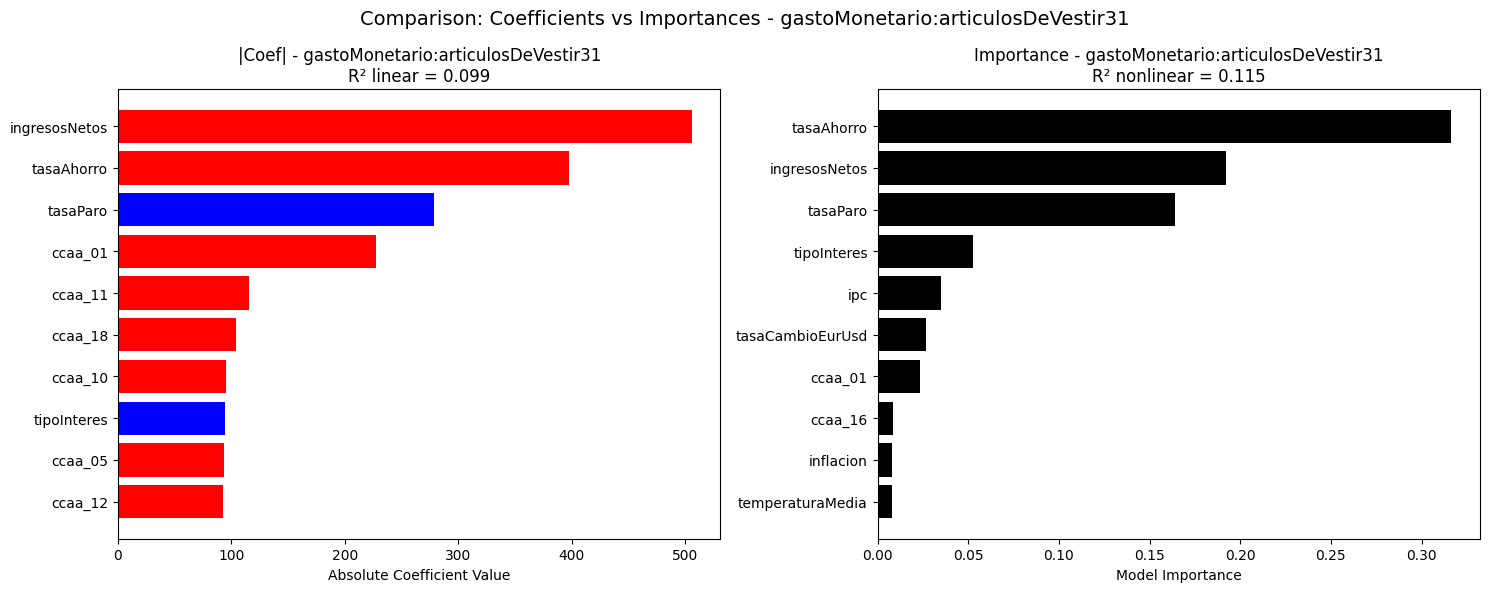

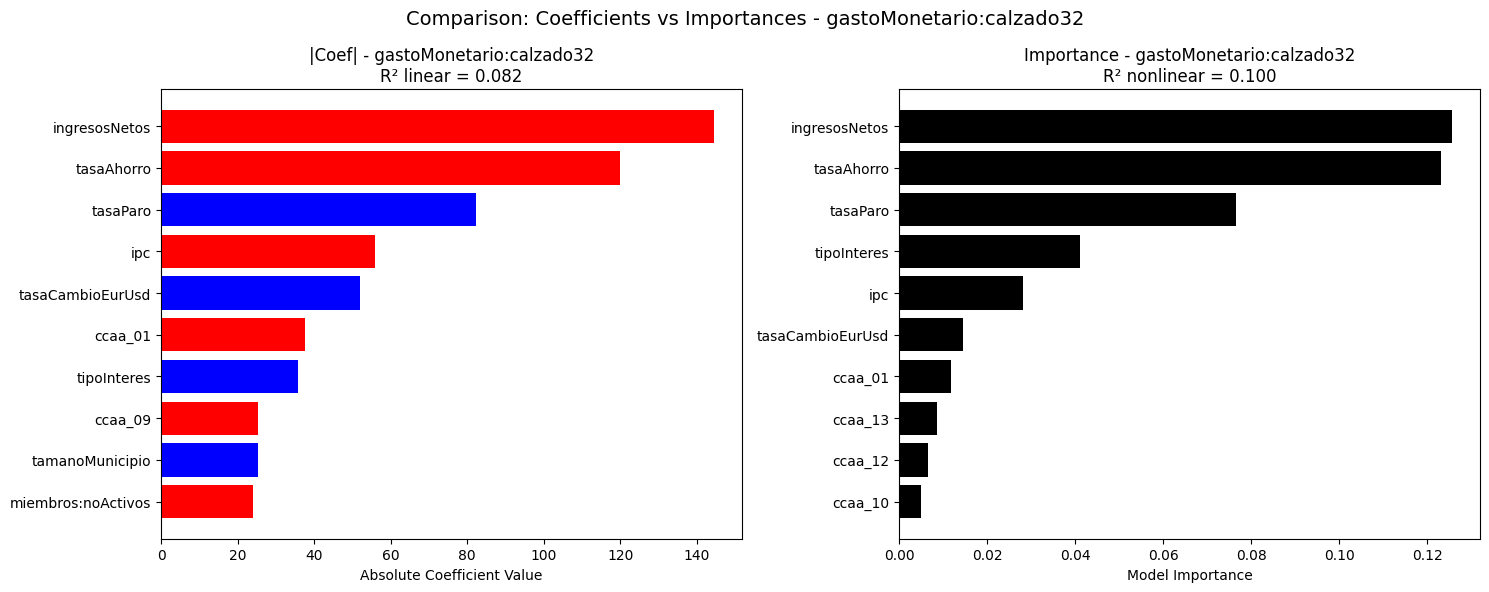

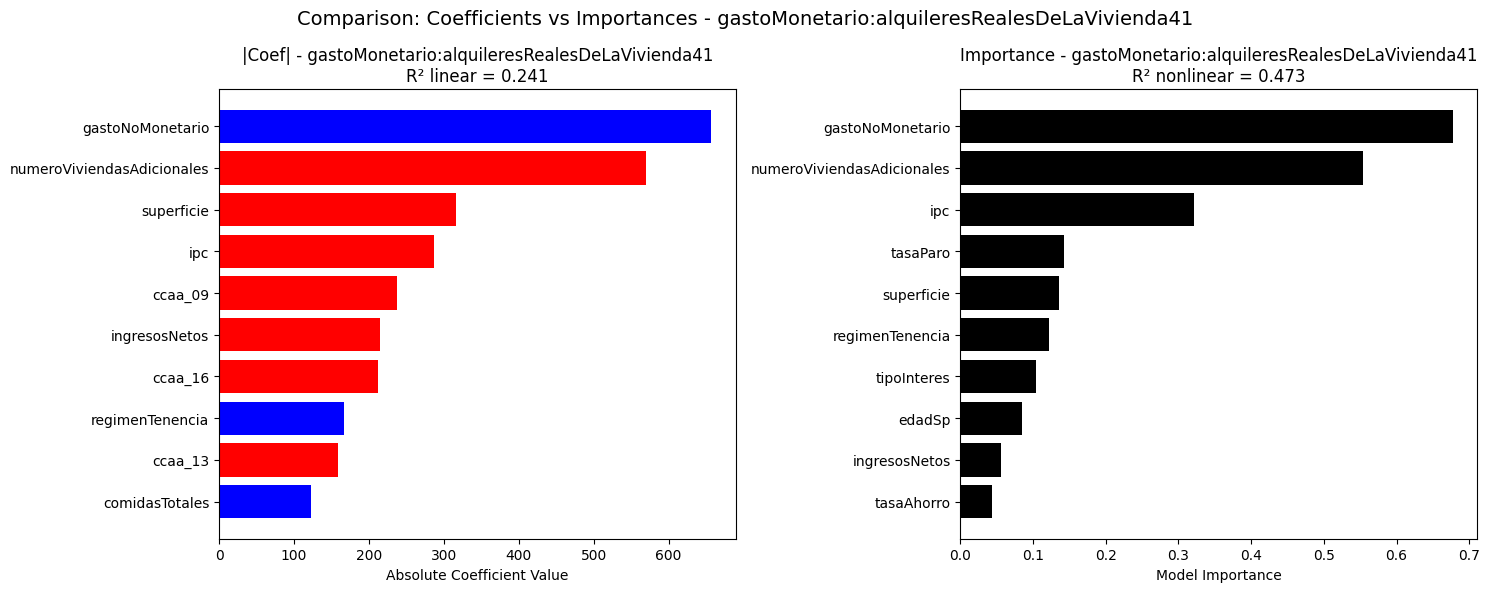

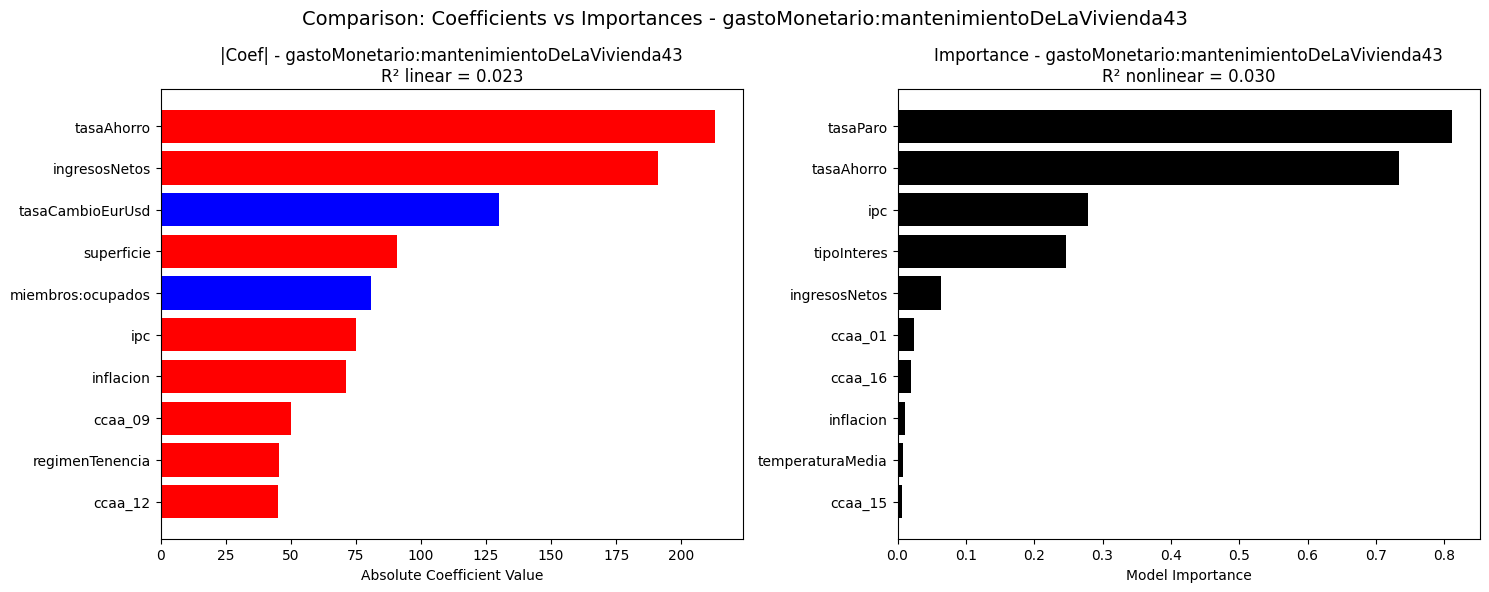

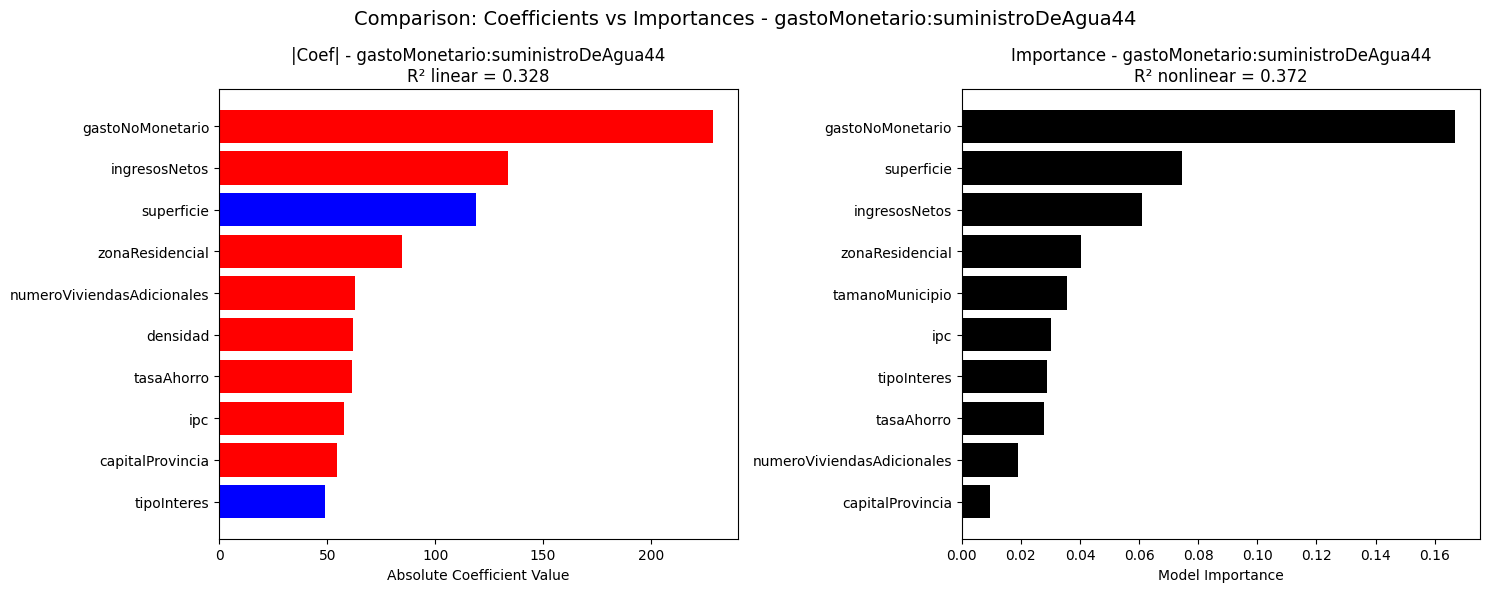

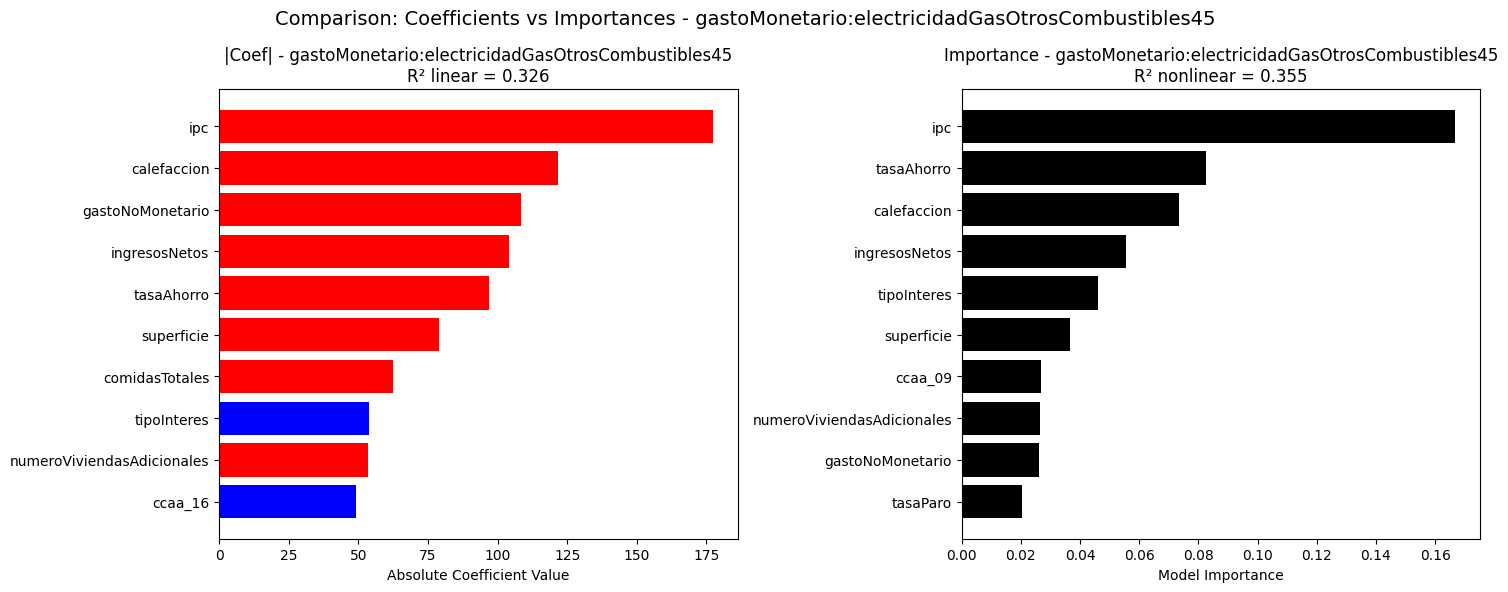

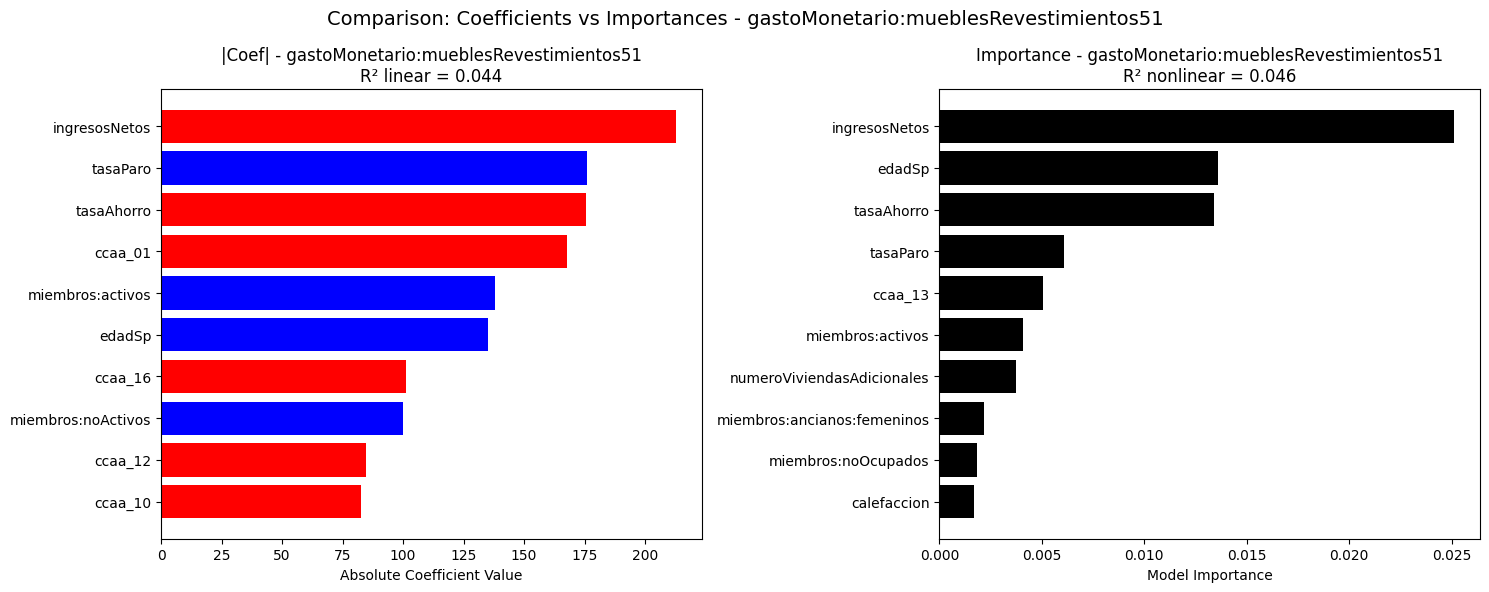

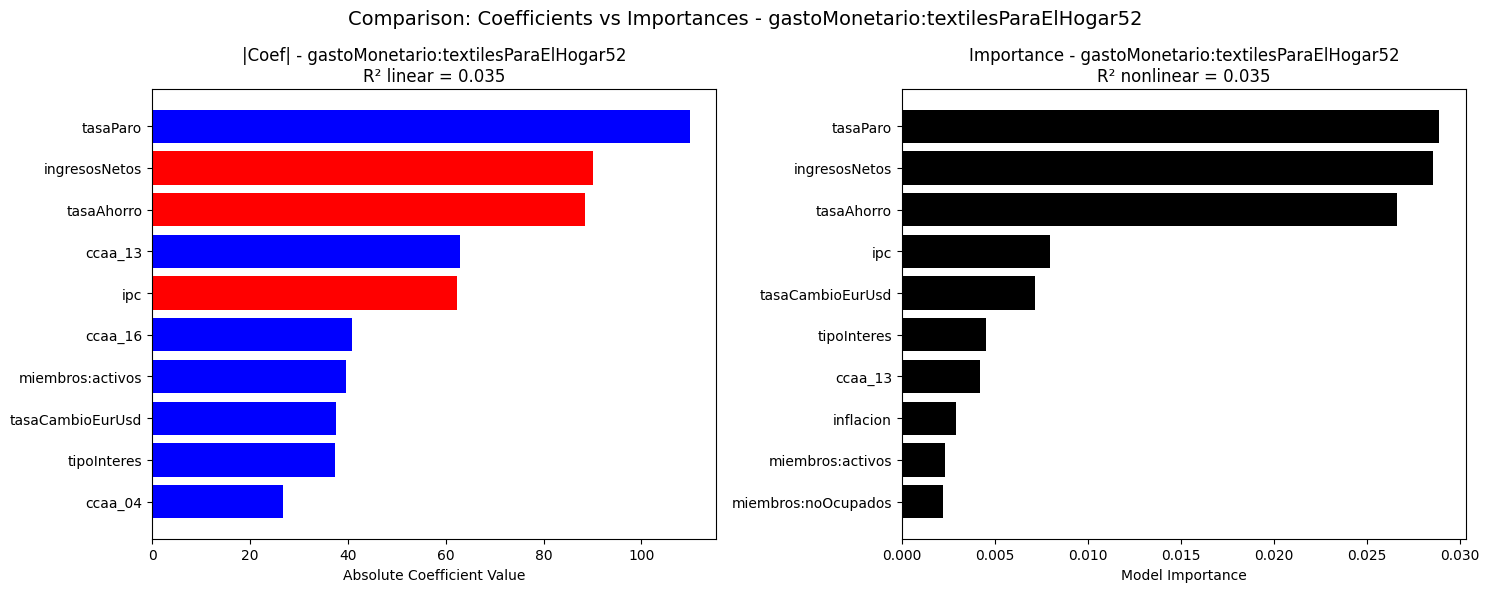

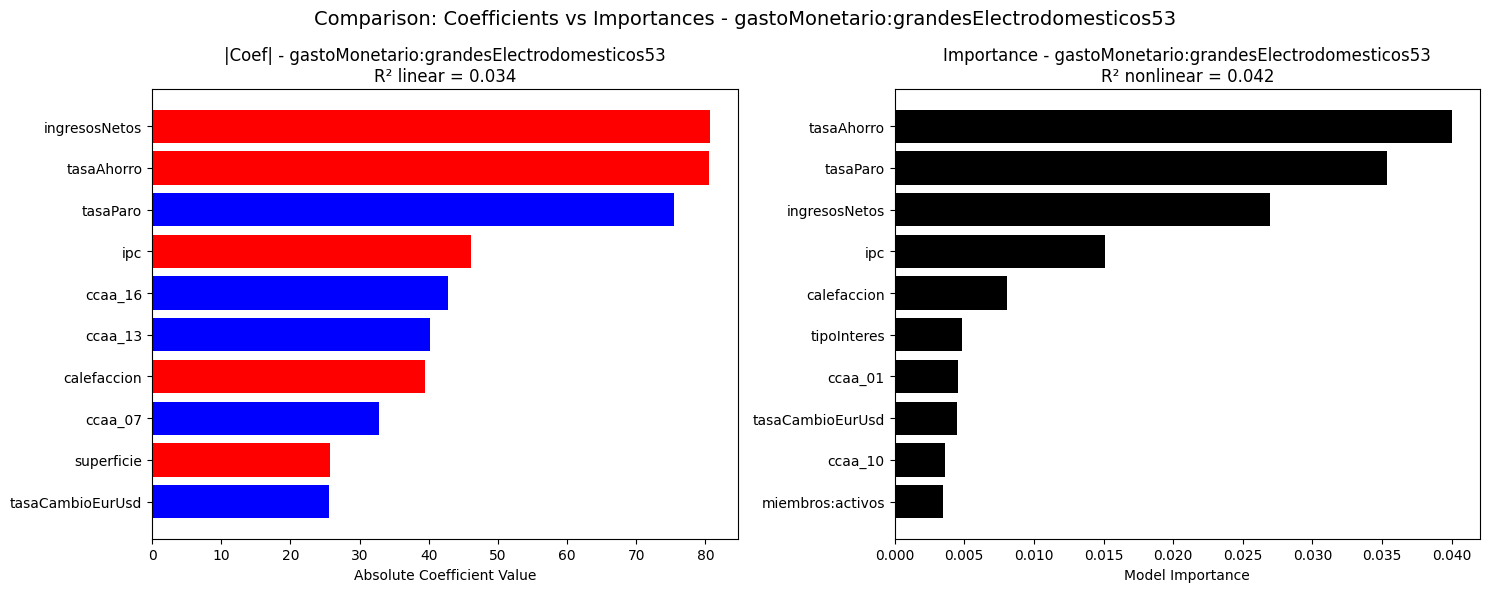

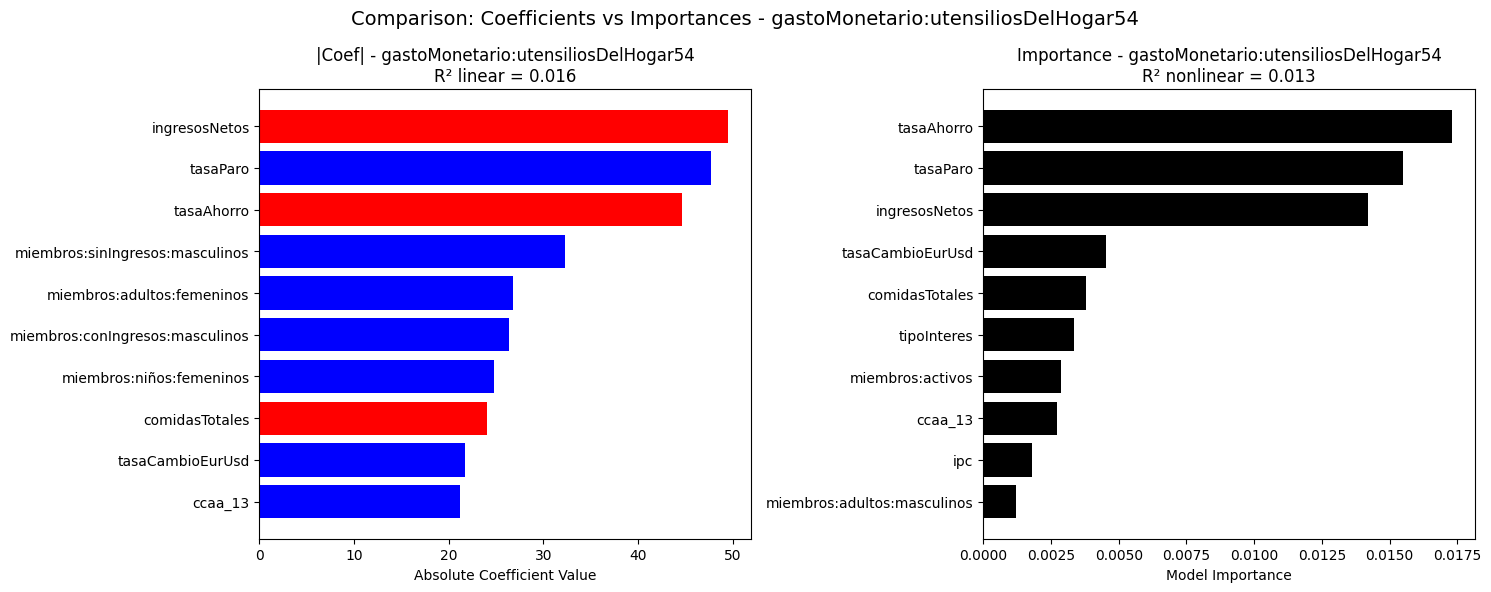

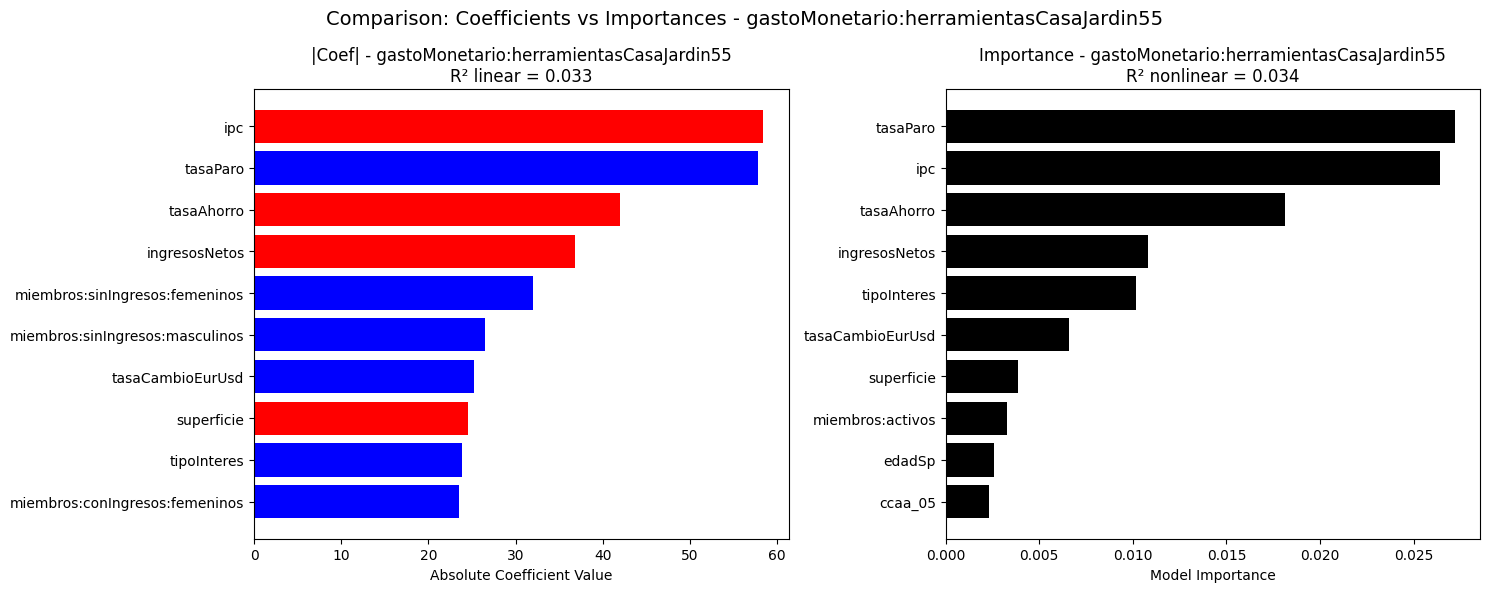

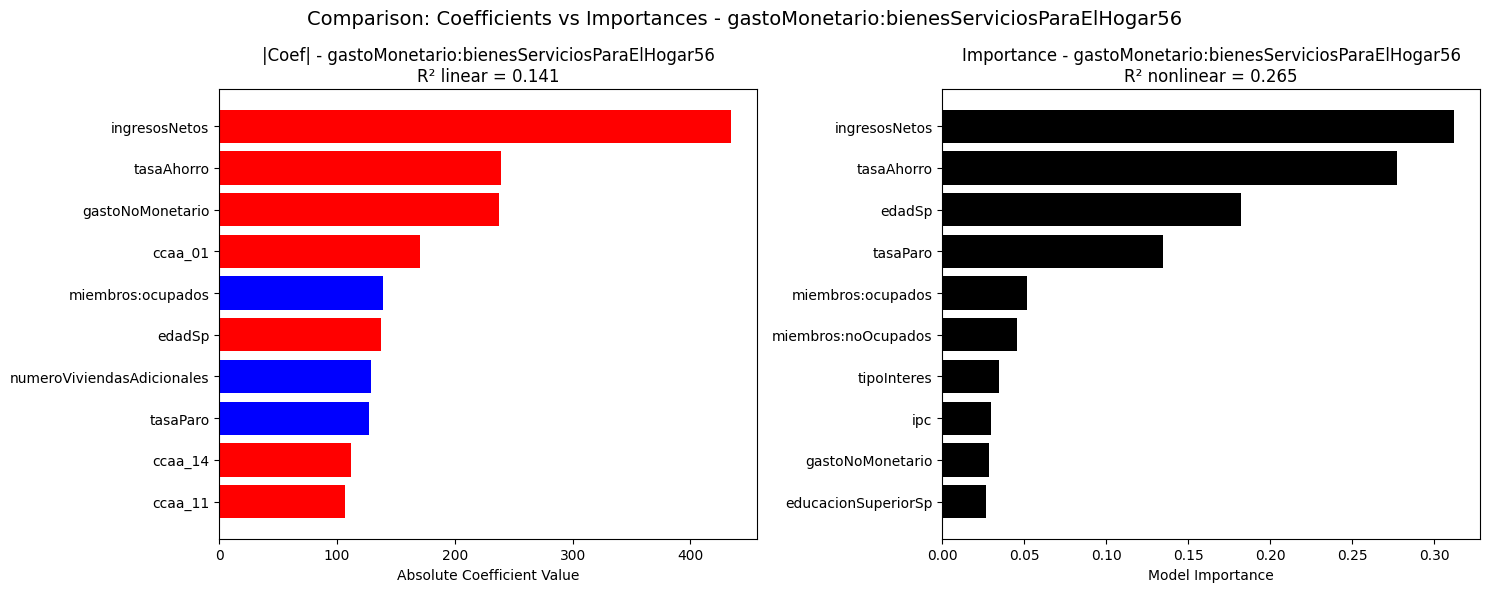

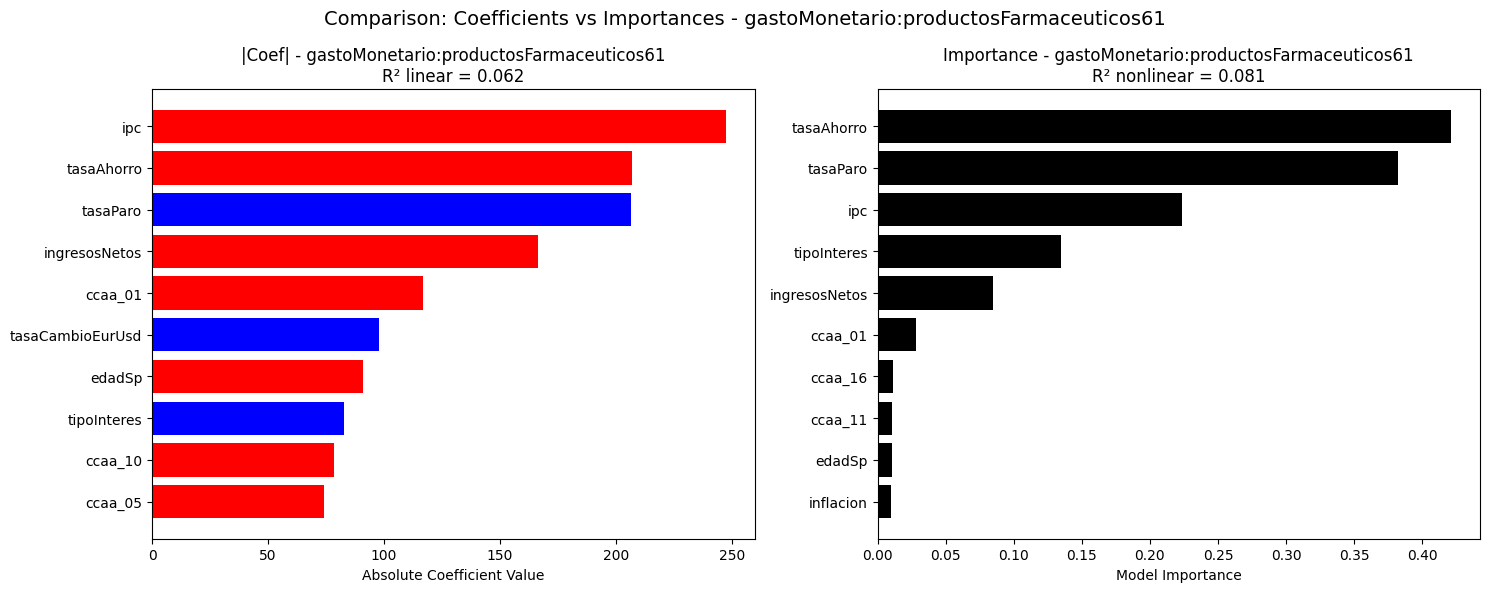

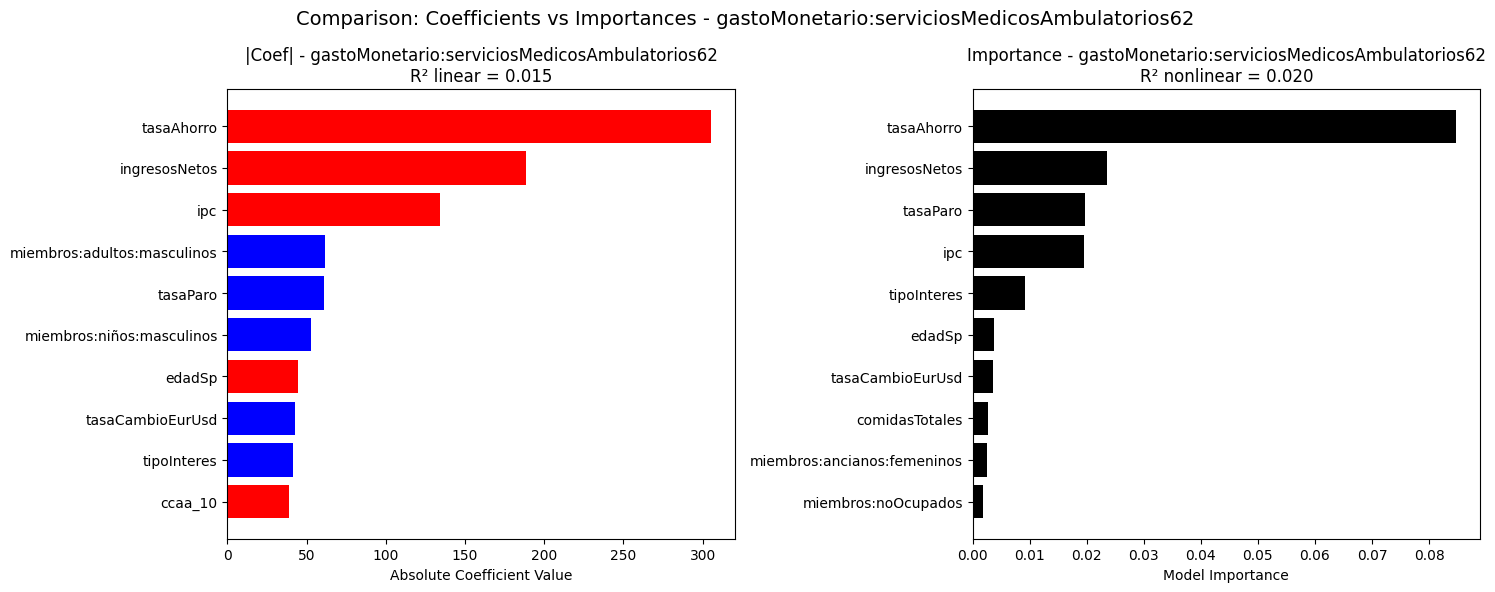

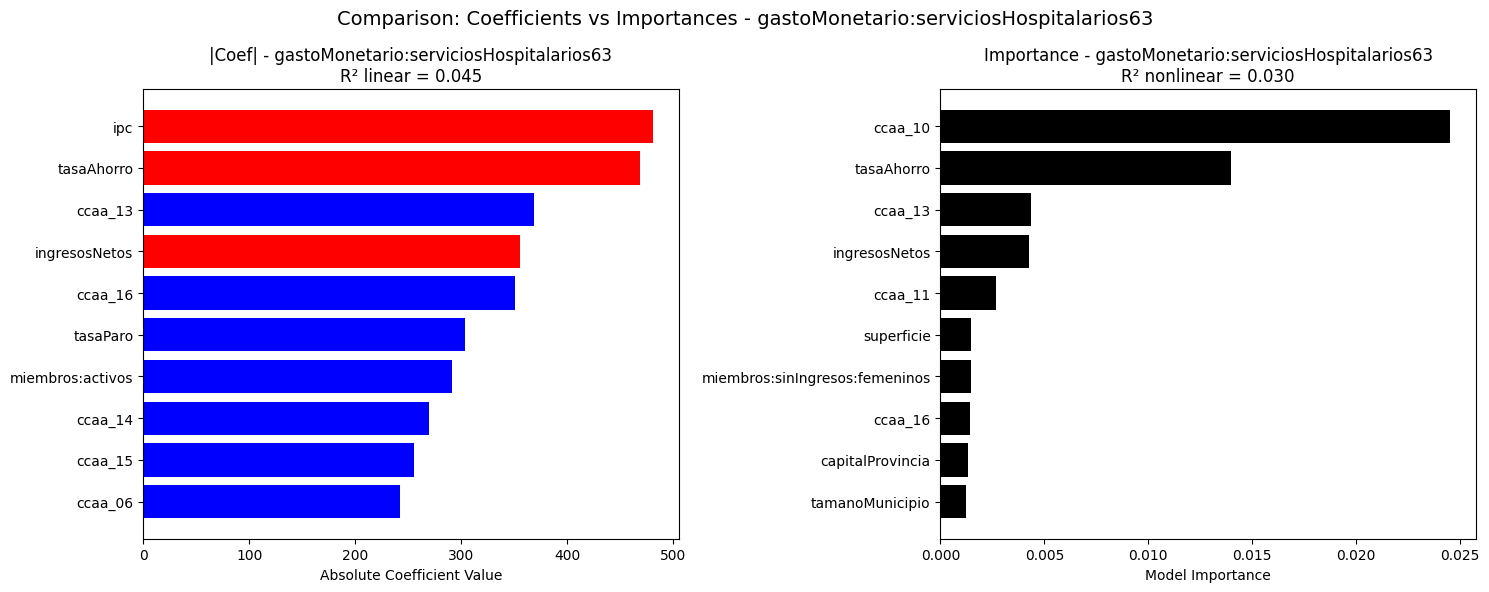

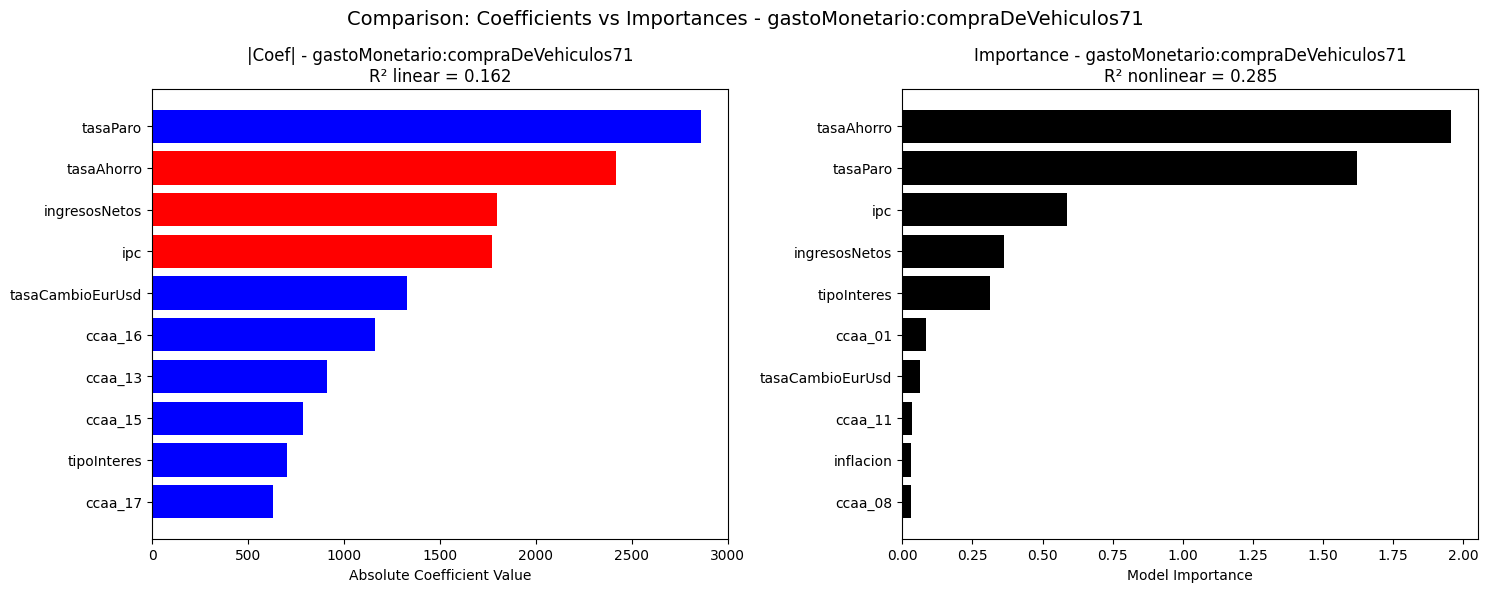

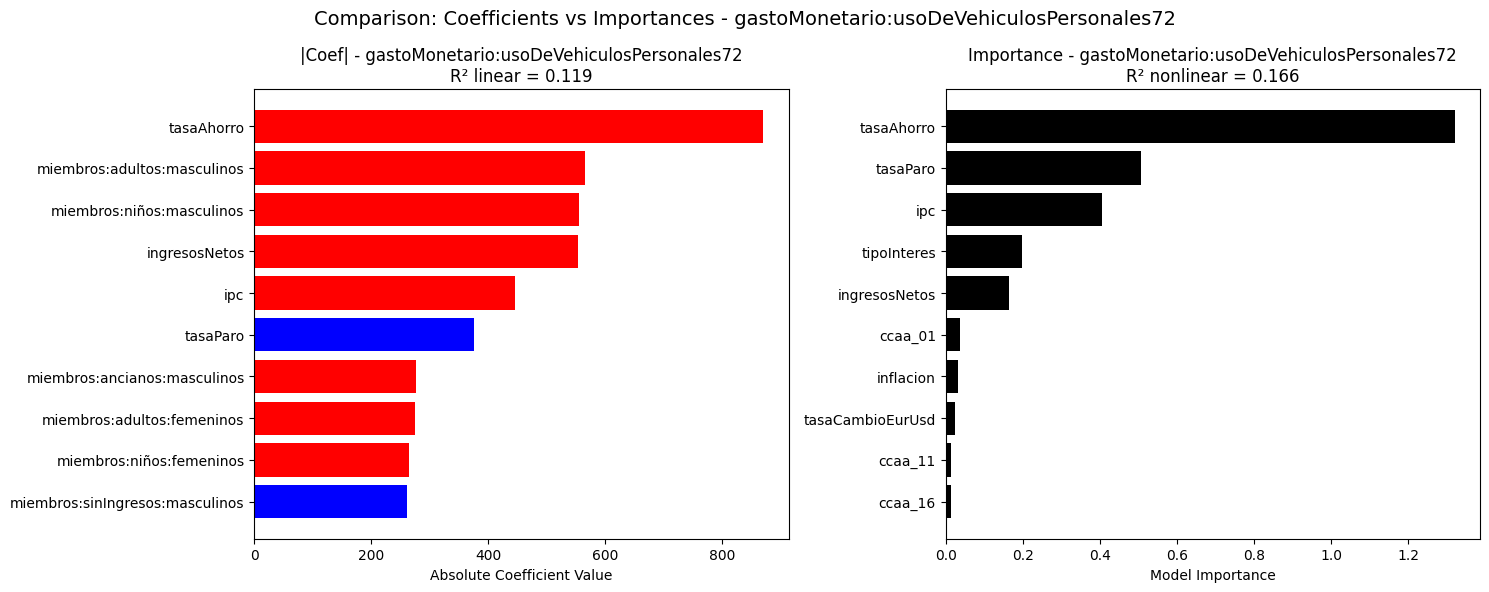

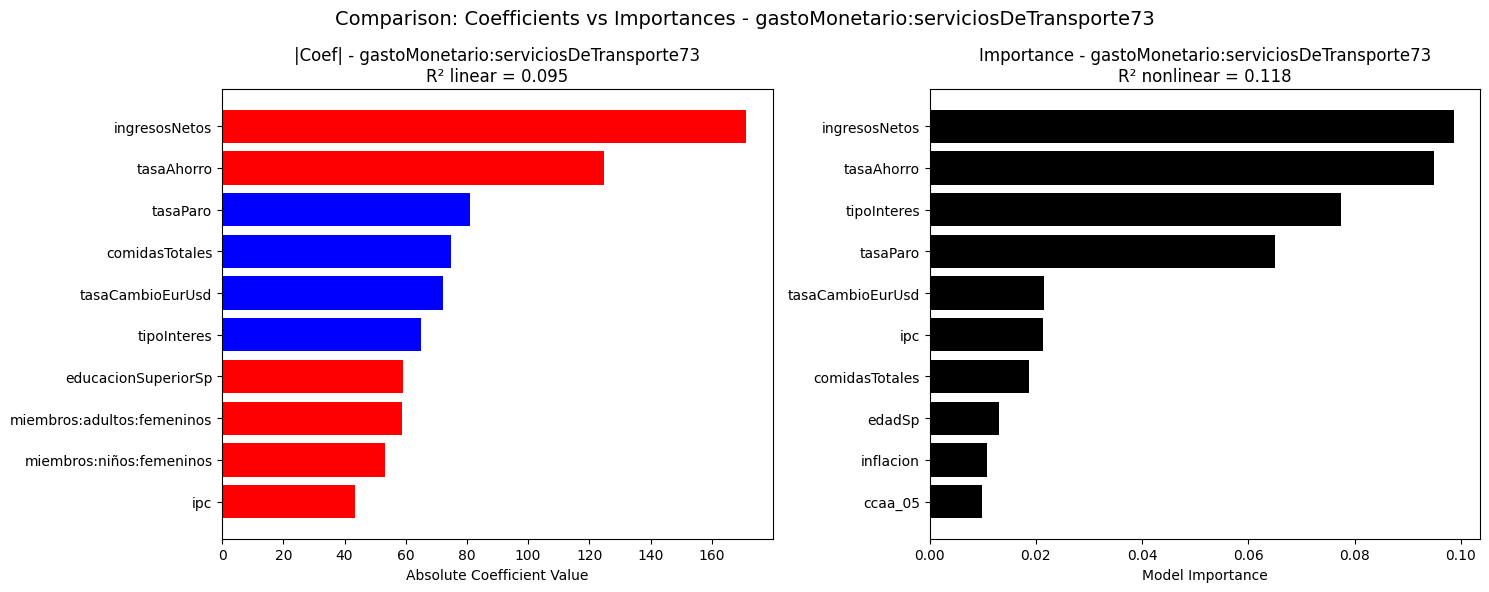

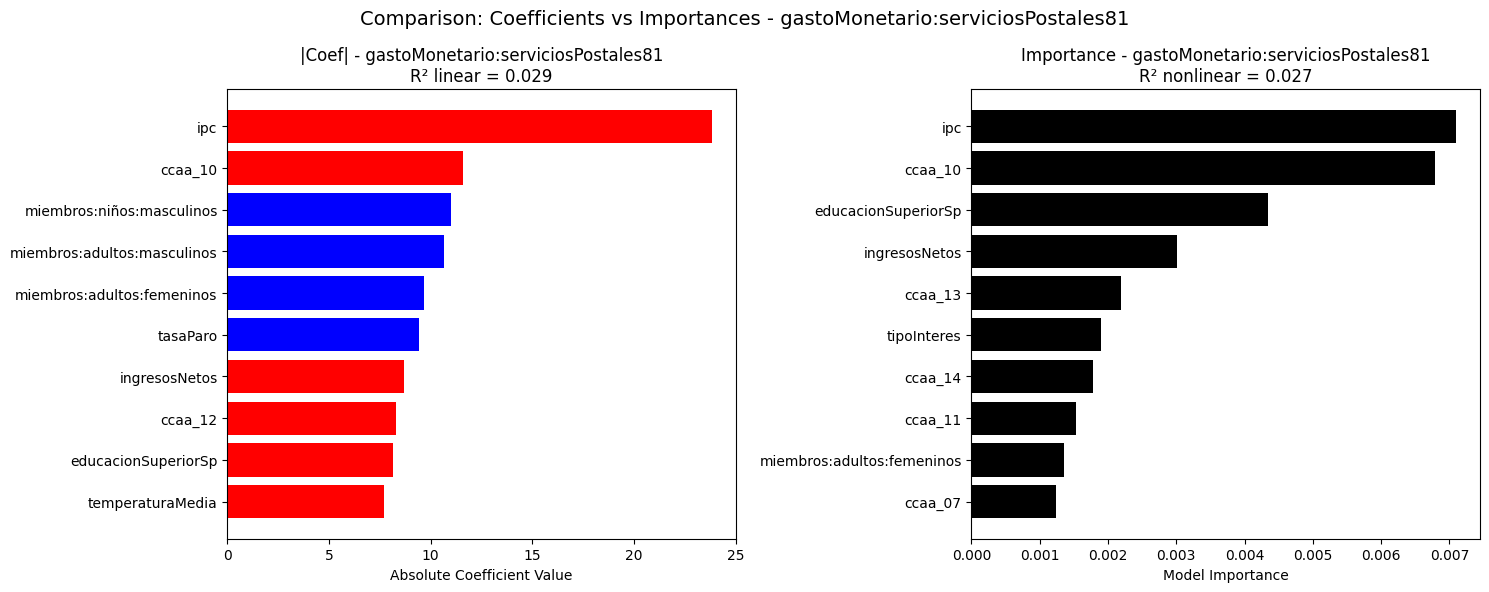

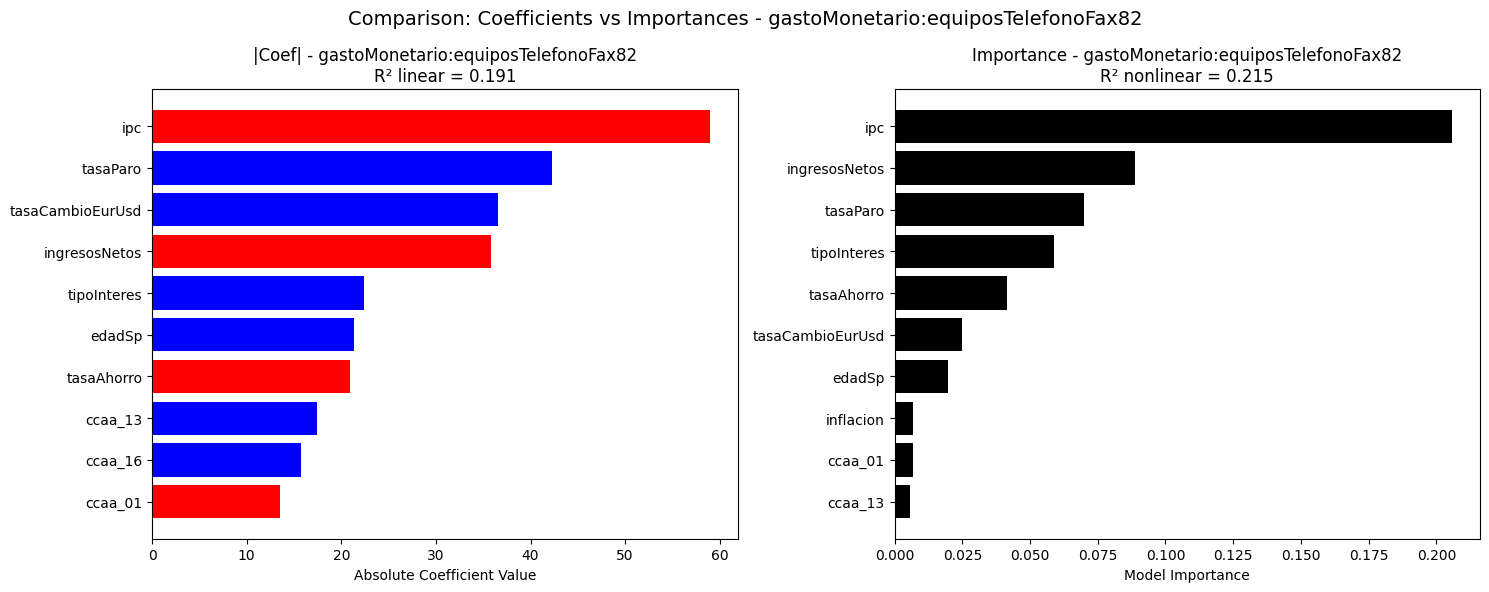

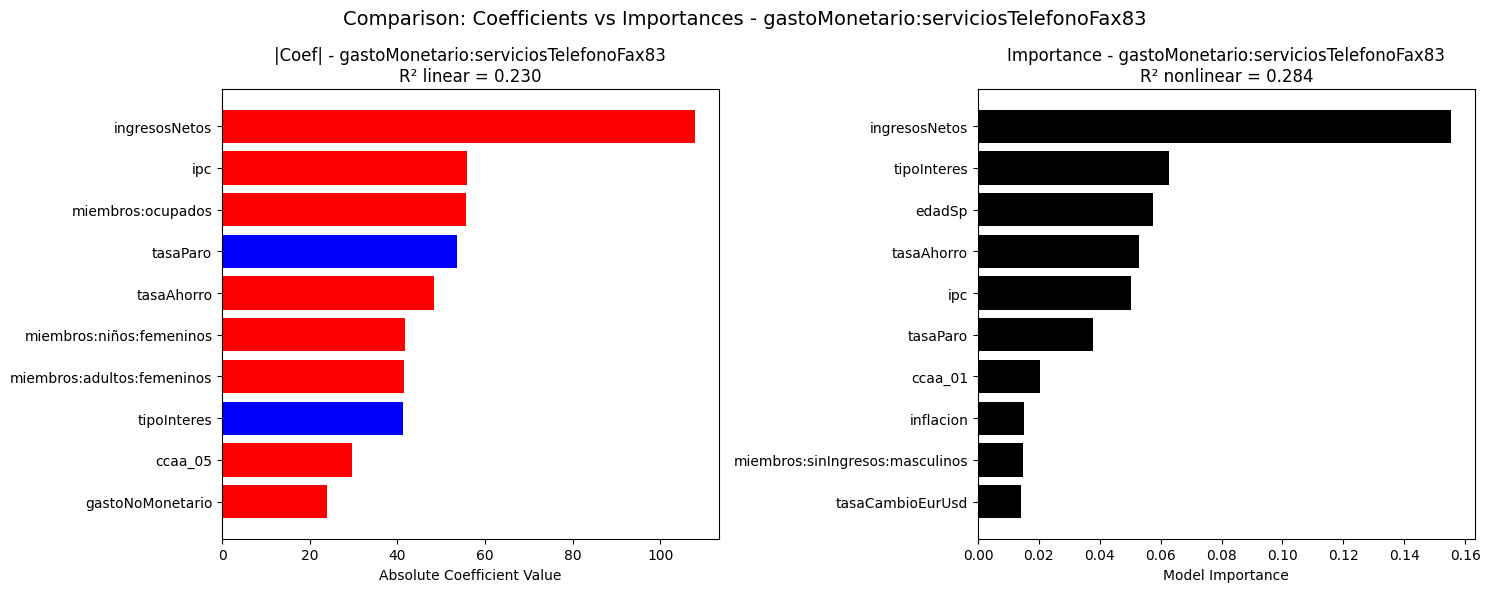

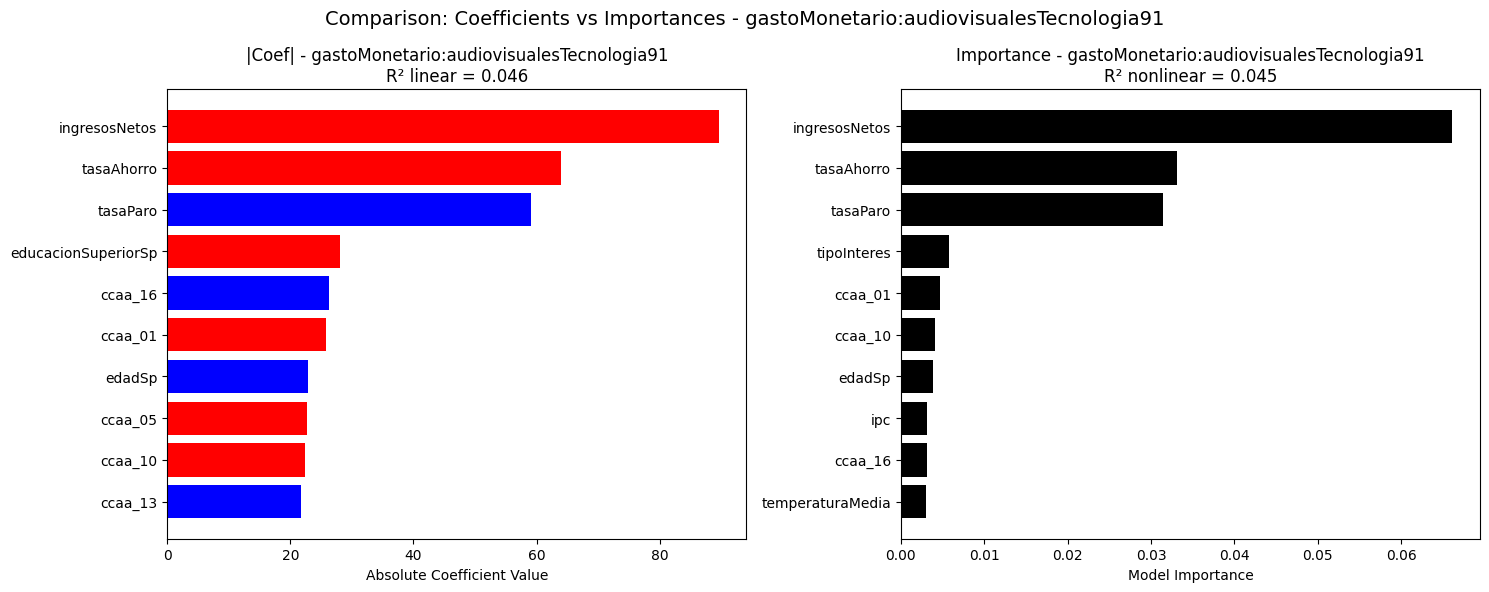

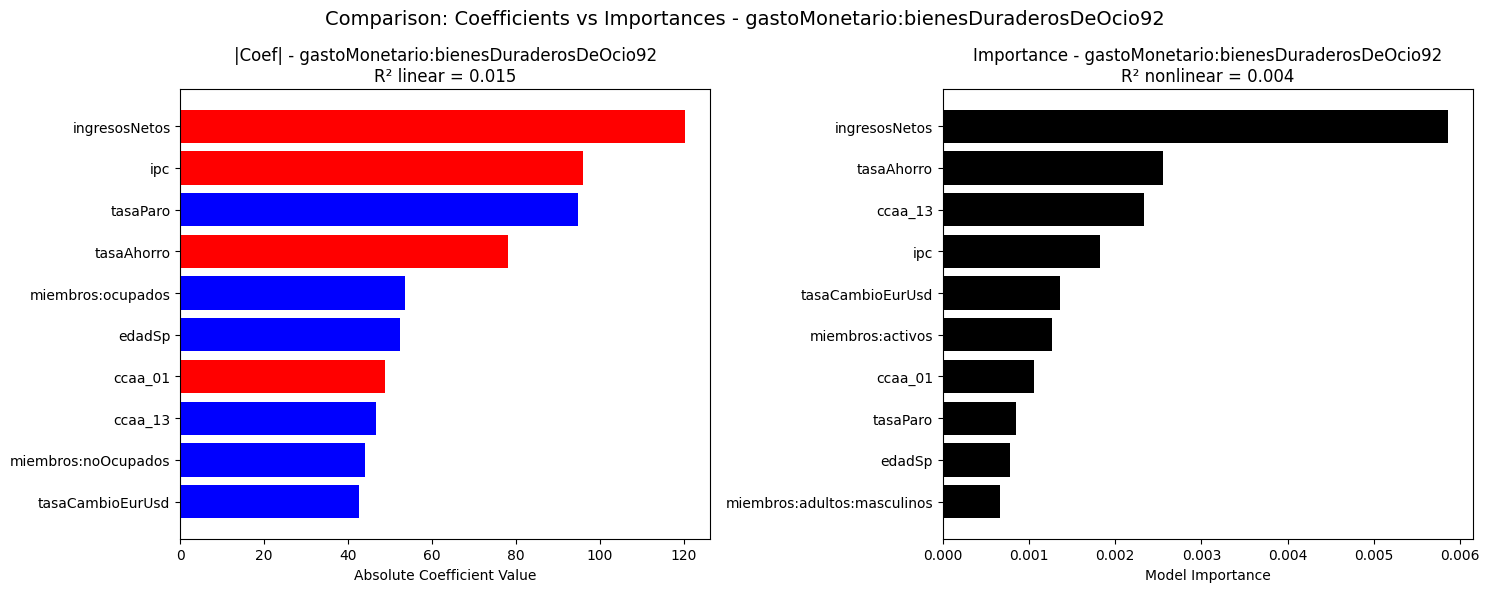

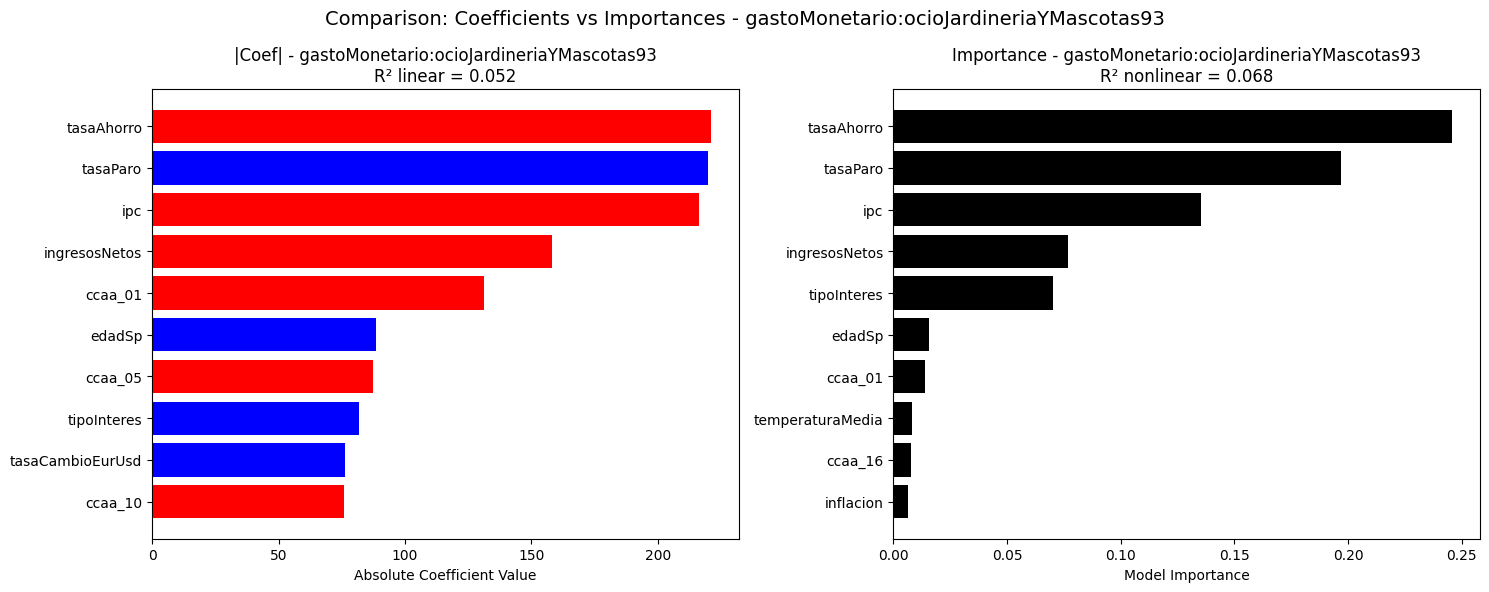

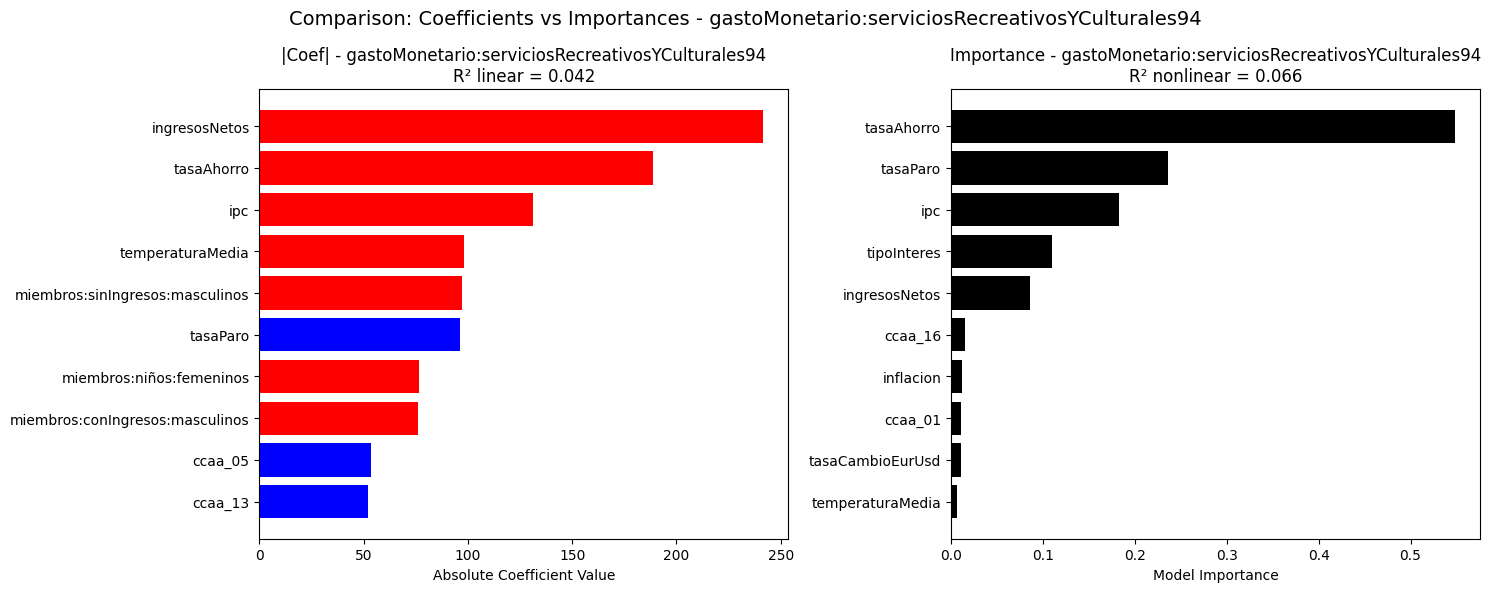

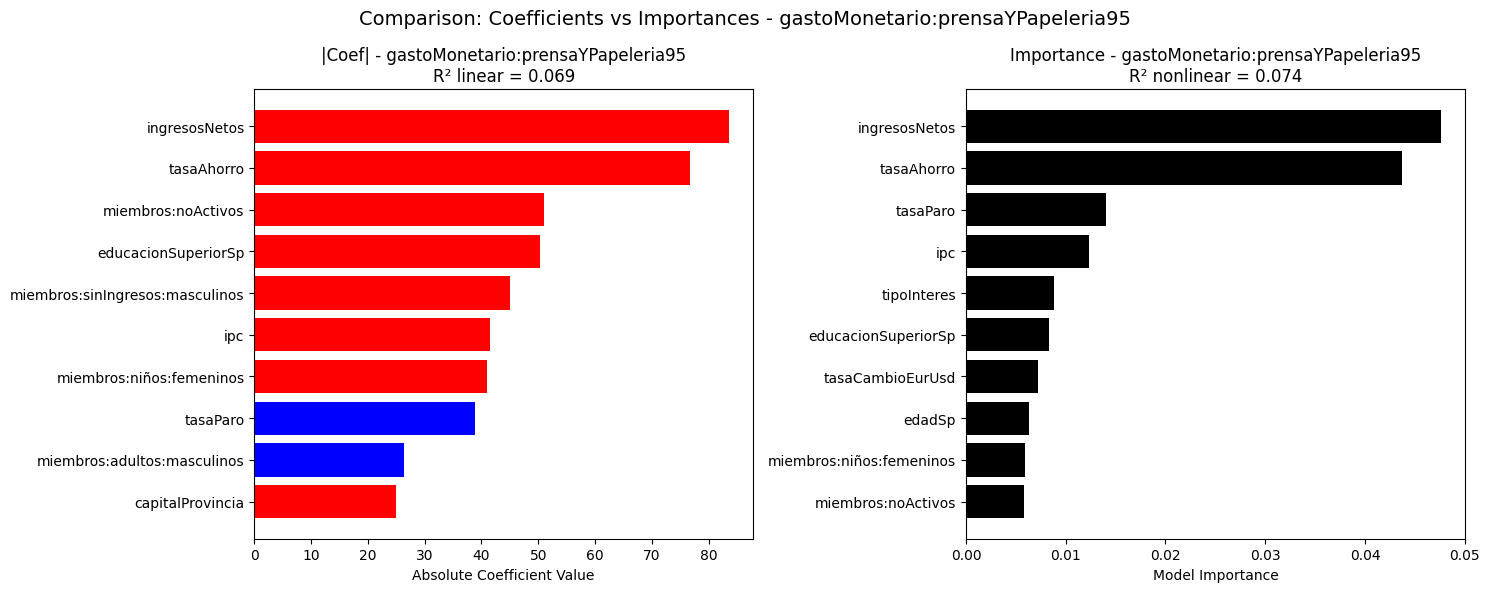

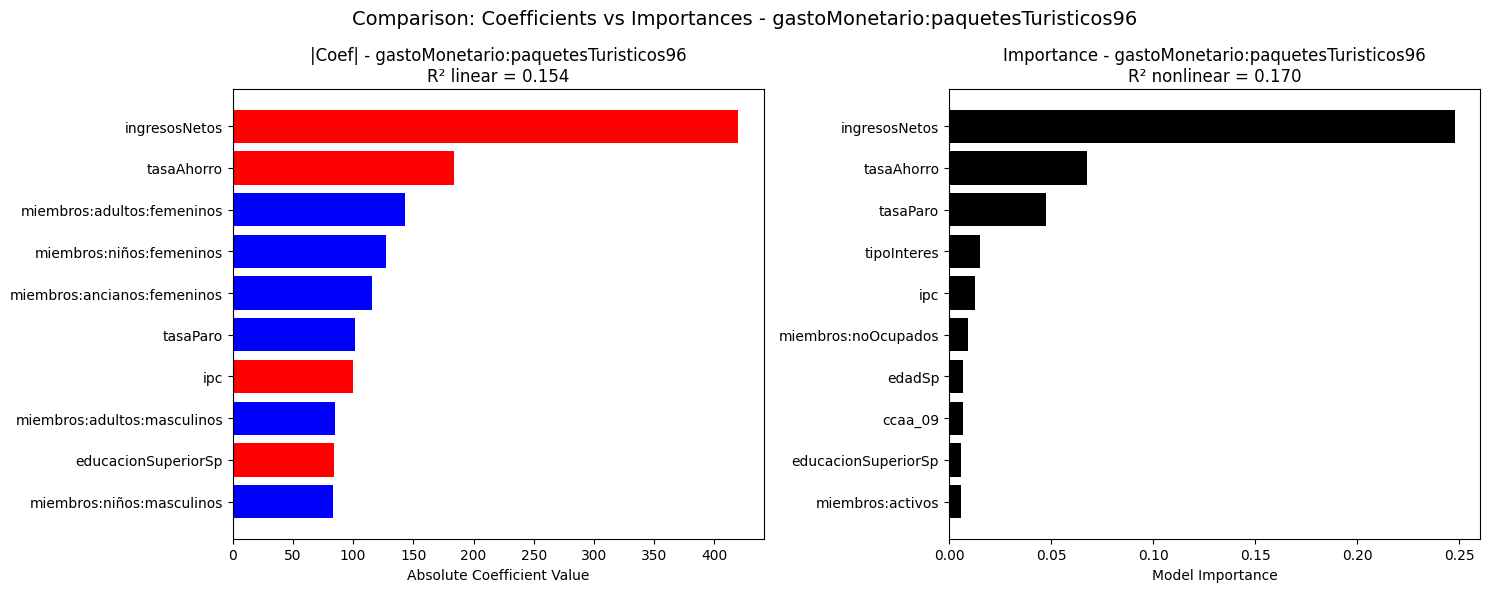

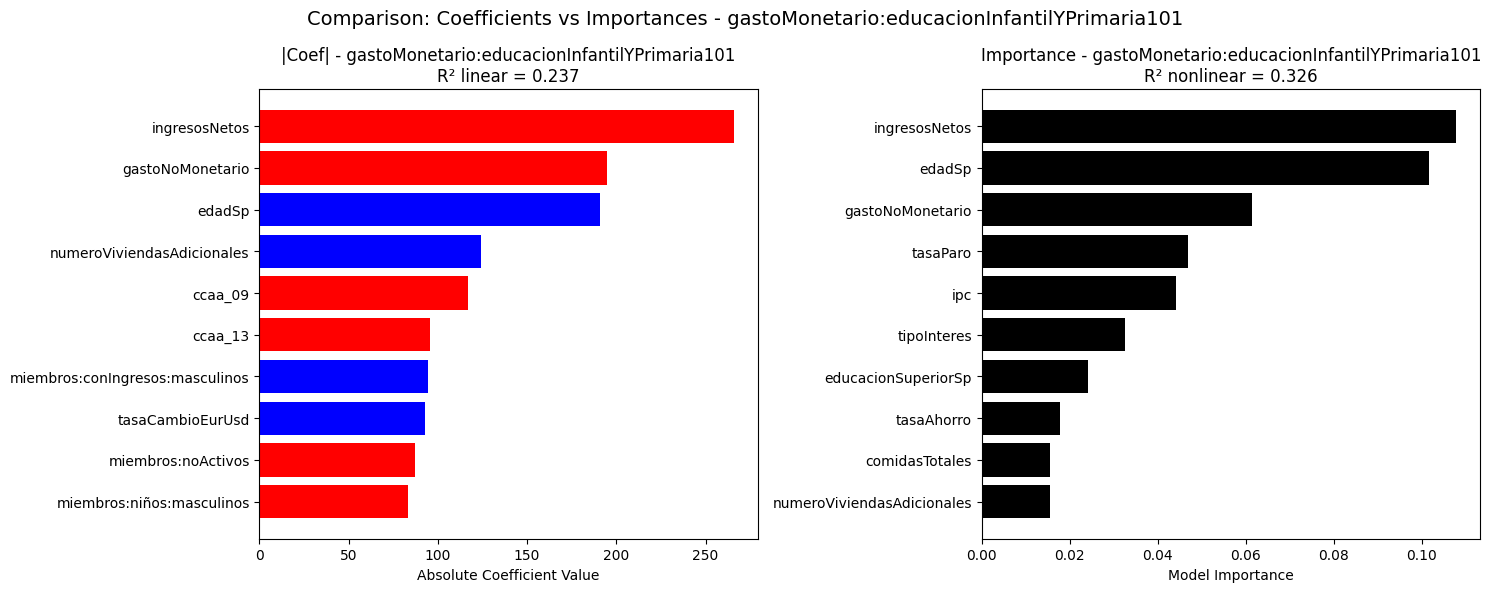

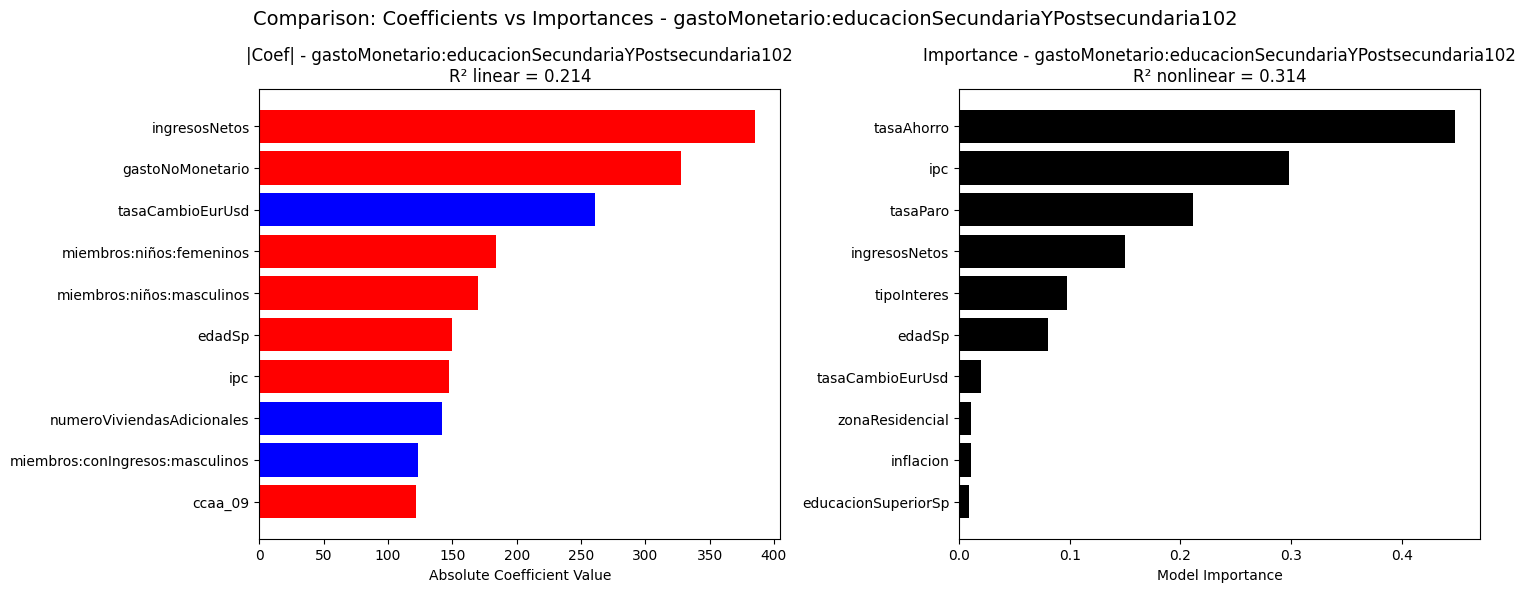

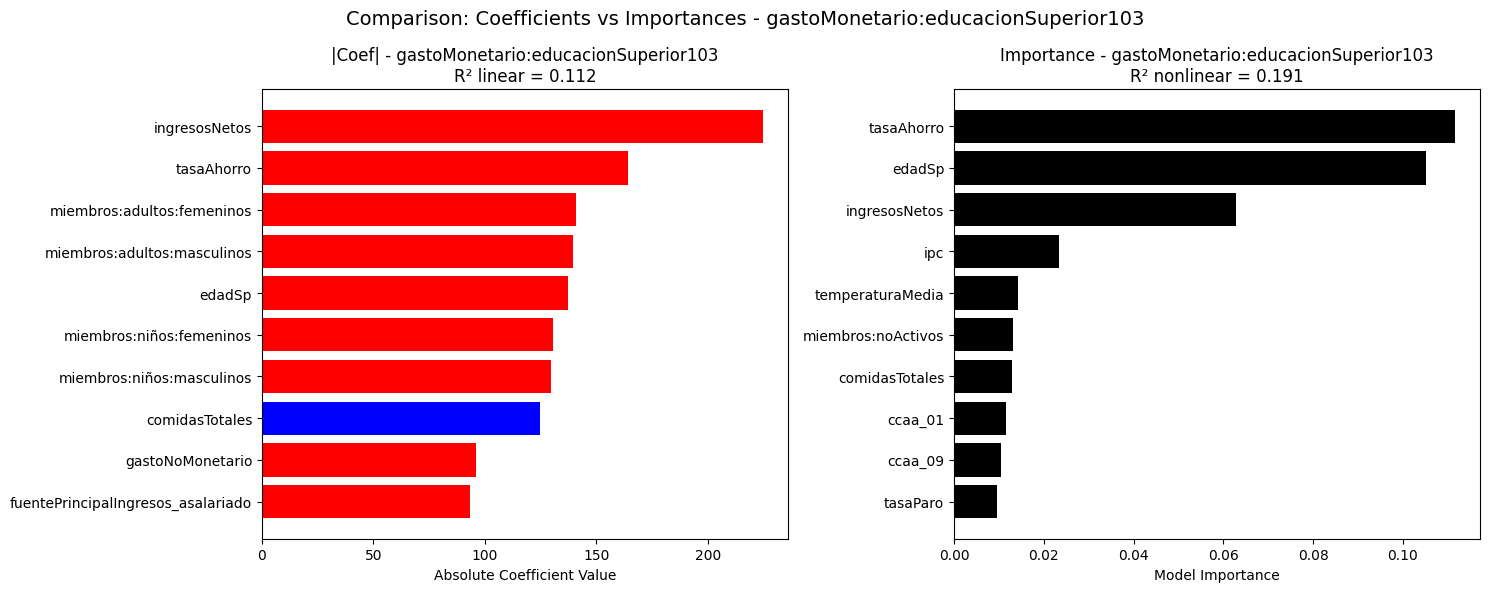

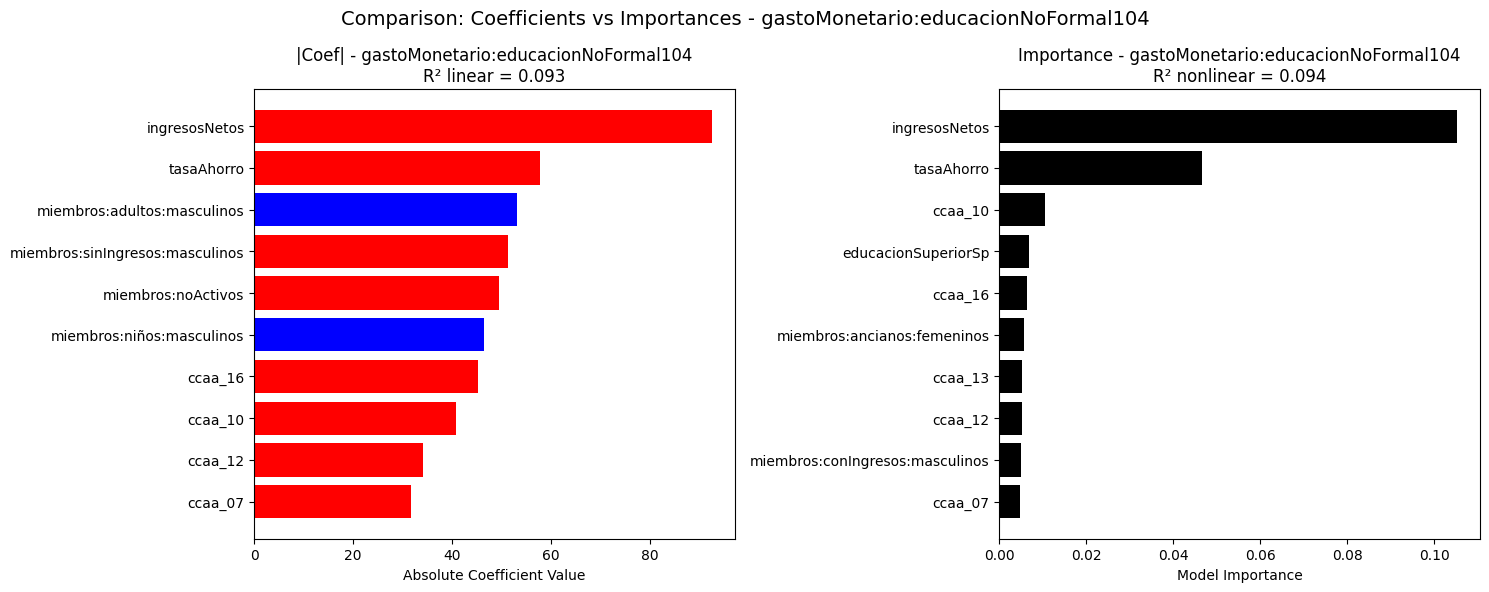

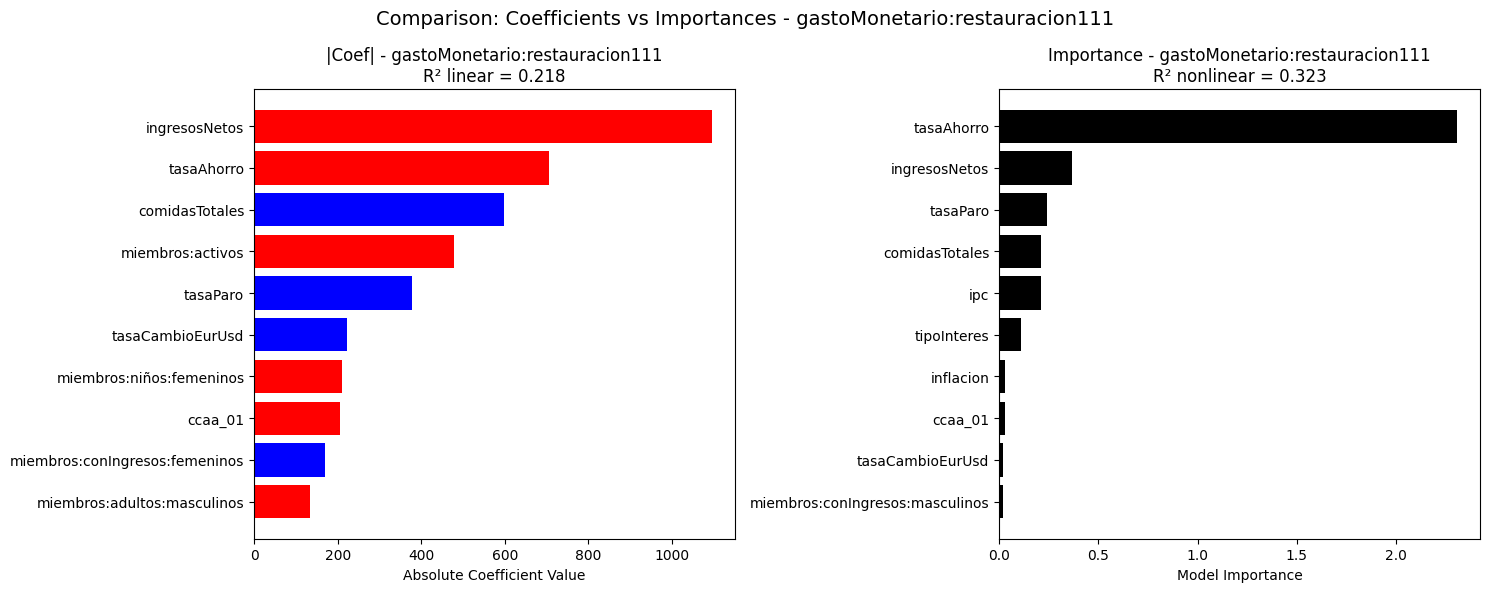

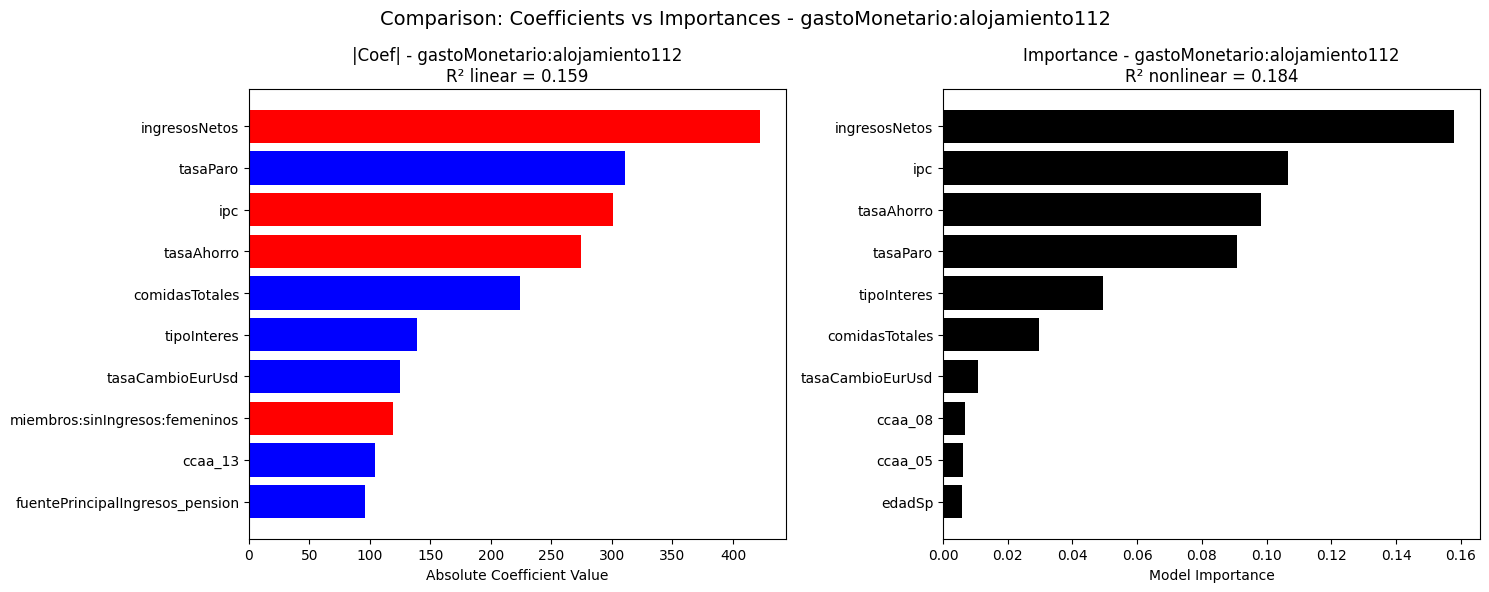

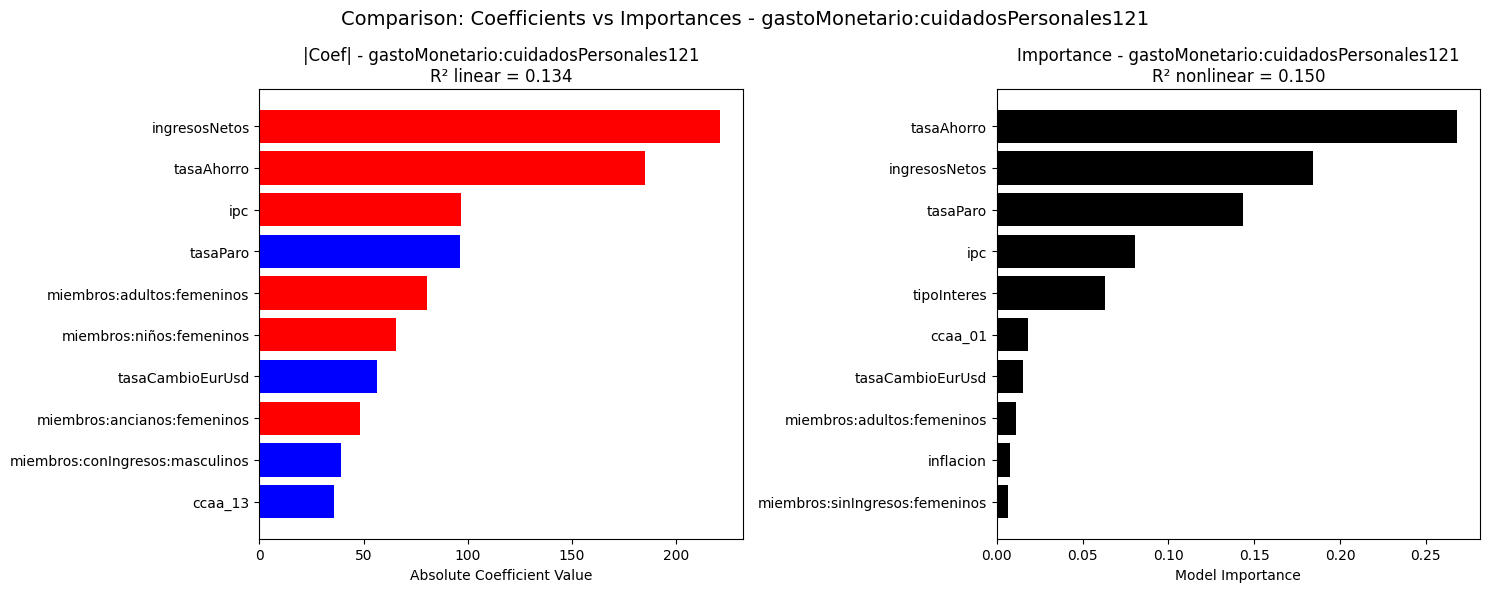

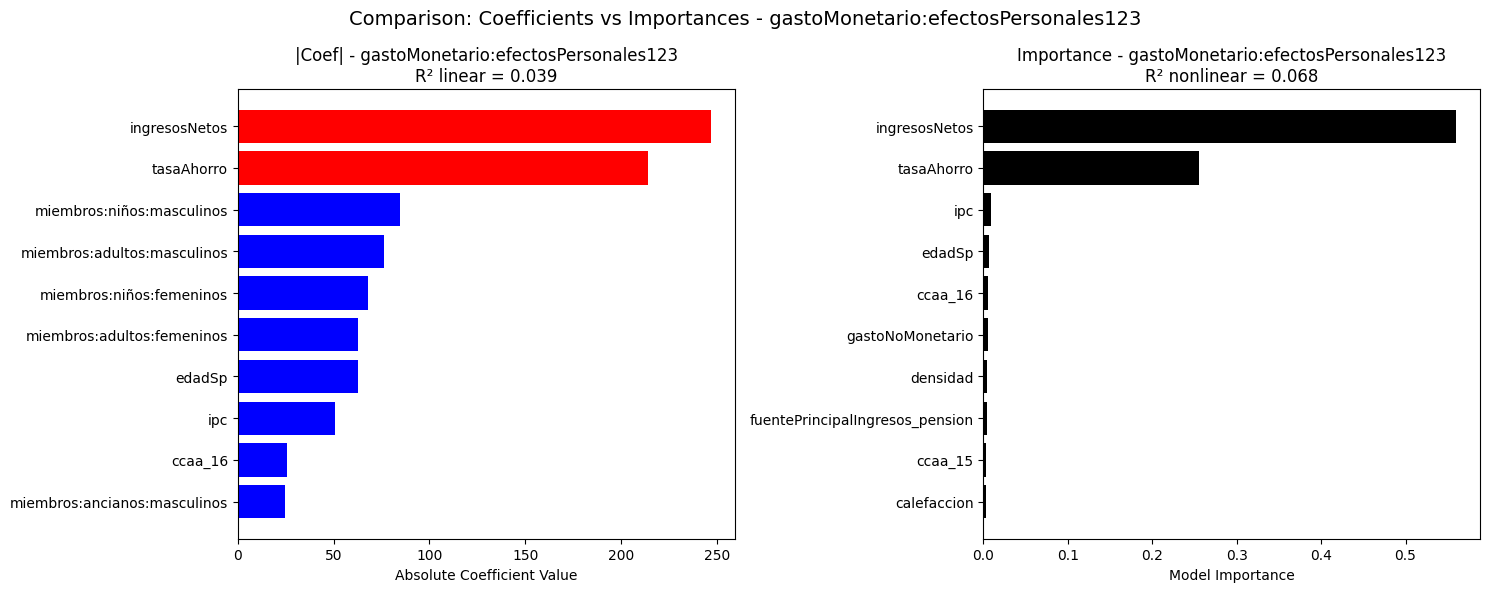

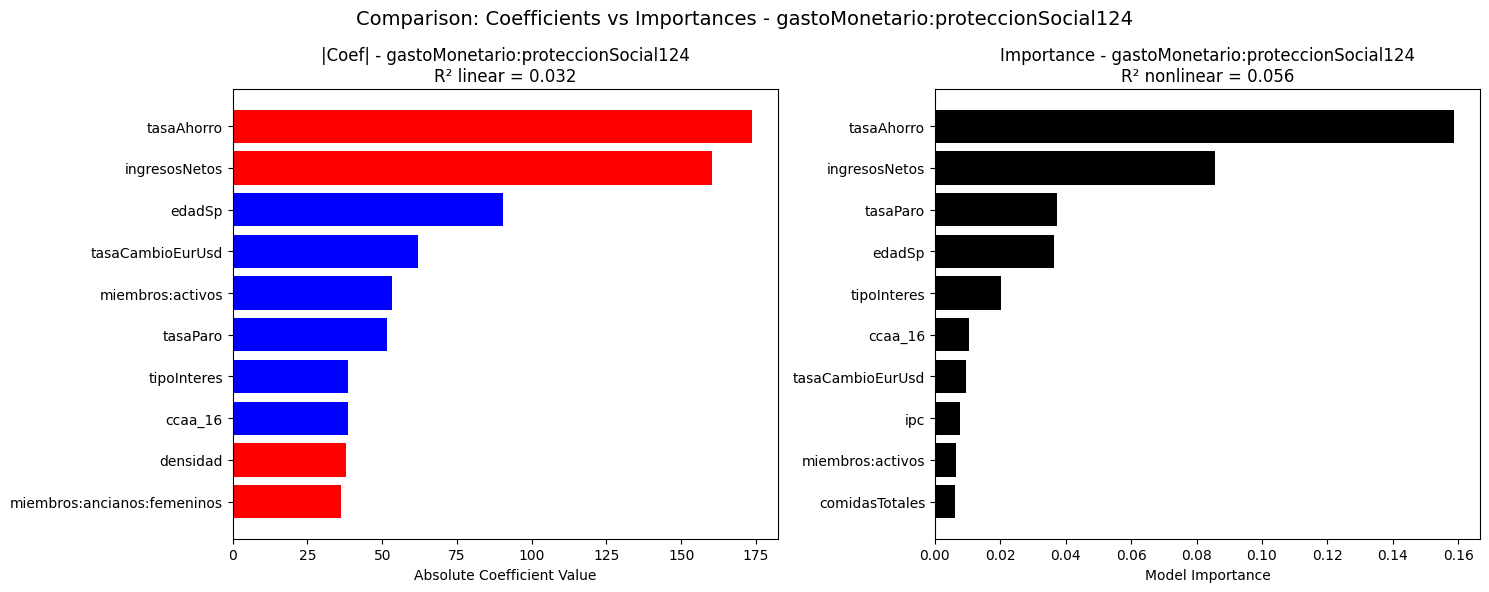

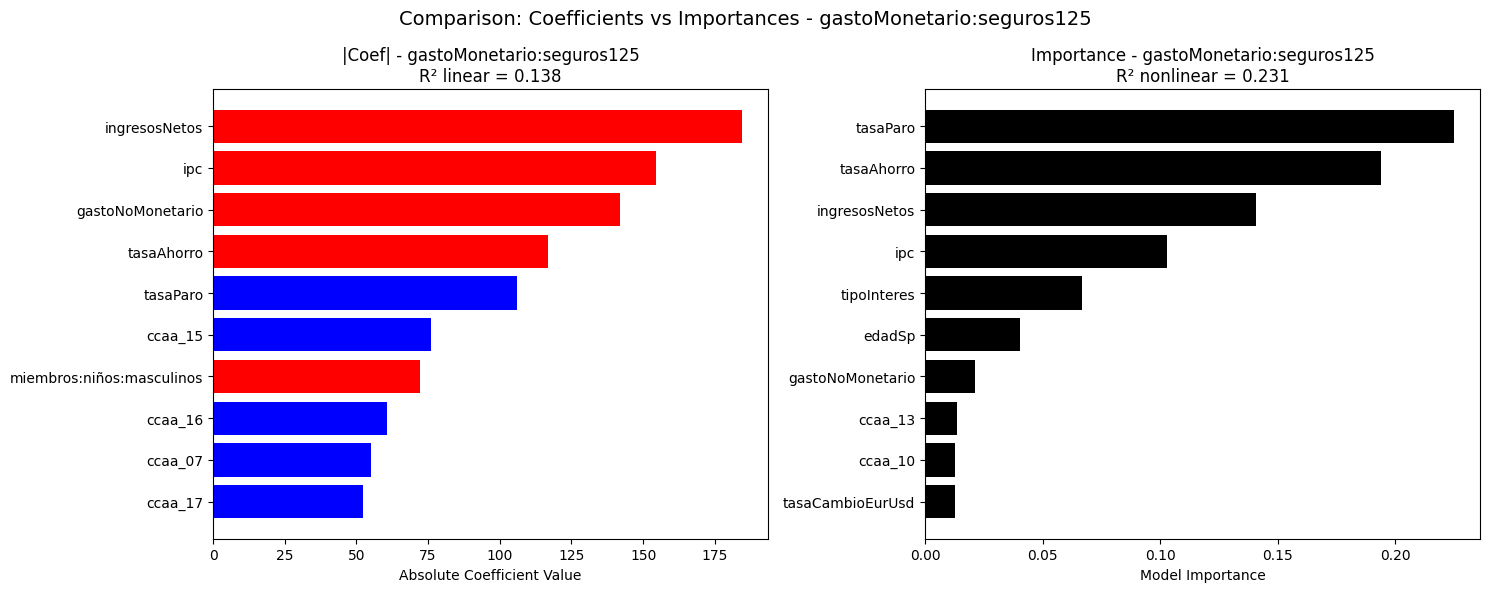

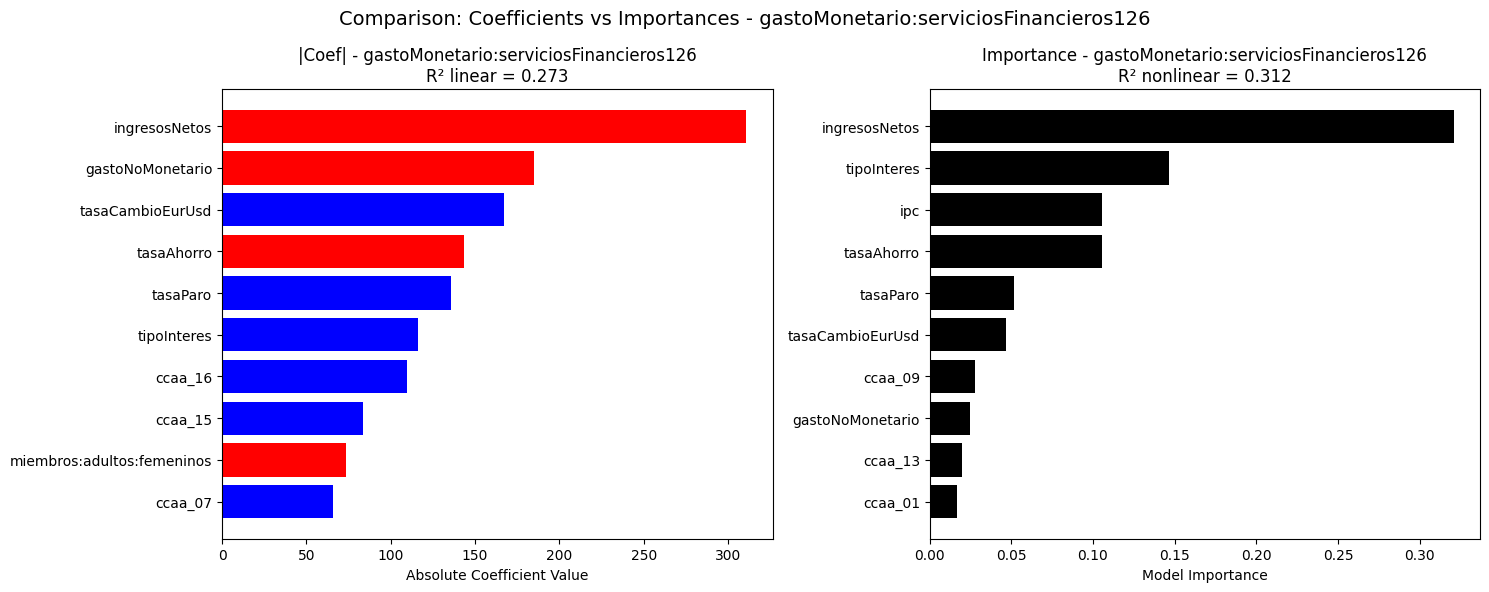

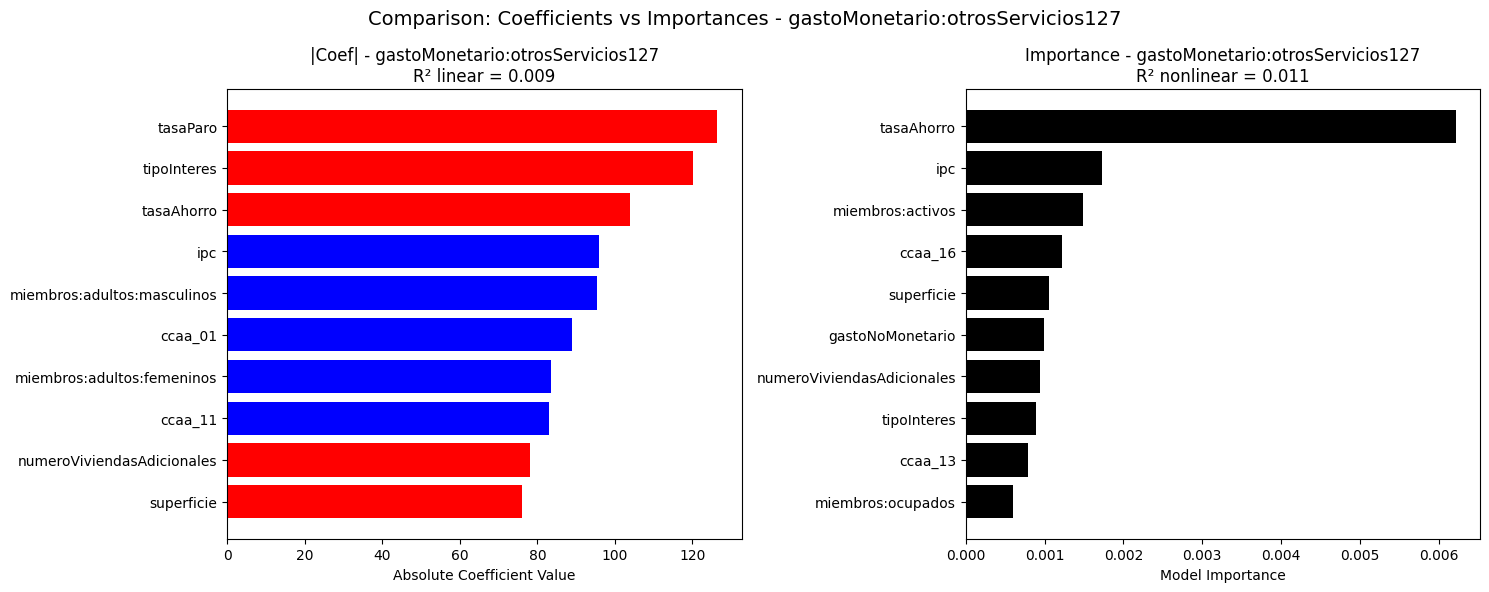

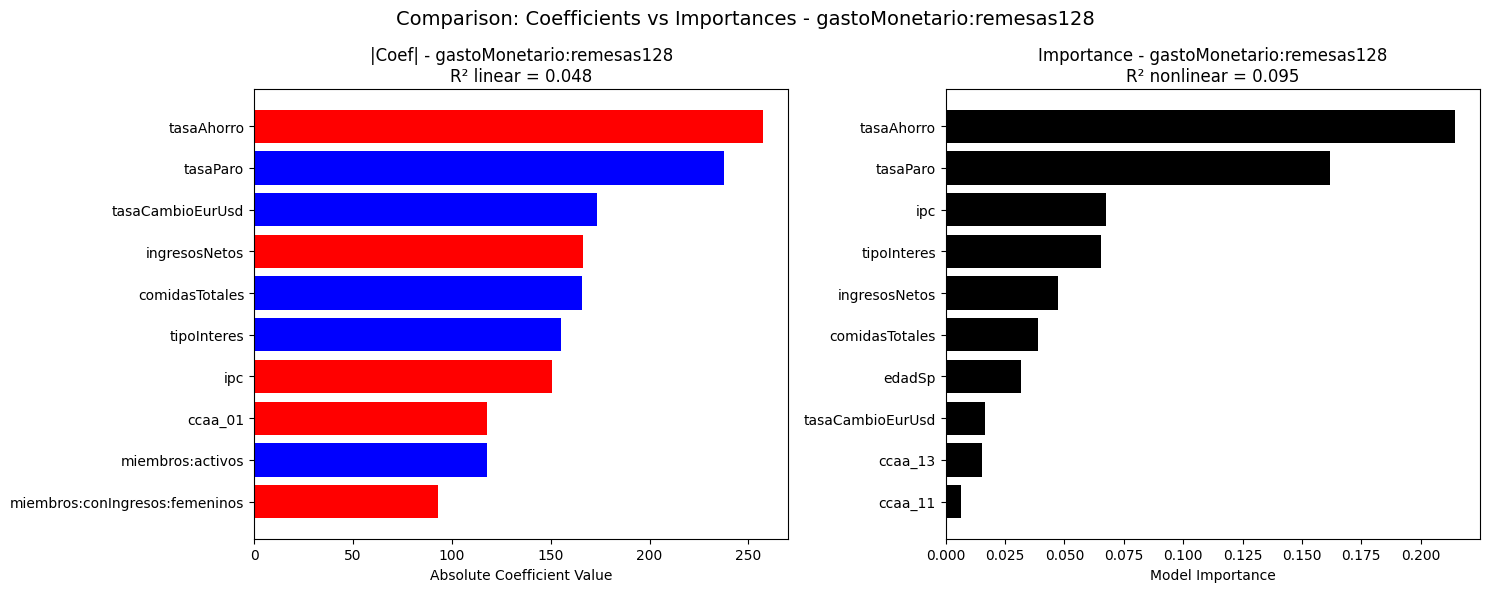

In [5]:
compare_coefficients_and_importances_with_r2(
    lineal_coefs_df,
    nonlineal_importances_df,
    metrics_lineal_df,
    metrics_nonlineal_df
)

### Tabla comparativa de la métrica R2

In [6]:
metrics_lineal_df

Gasto        R²  R² Ajustado  \
0                   gastoMonetario:suministroDeAgua44  0.327572     0.327488   
1   gastoMonetario:electricidadGasOtrosCombustibles45  0.326103     0.326017   
2              gastoMonetario:productosAlimenticios11  0.324748     0.324659   
3              gastoMonetario:serviciosFinancieros126  0.272634     0.272446   
4       gastoMonetario:alquileresRealesDeLaVivienda41  0.241450     0.240969   
5        gastoMonetario:educacionInfantilYPrimaria101  0.236861     0.236452   
6               gastoMonetario:serviciosTelefonoFax83  0.229616     0.229517   
7                      gastoMonetario:restauracion111  0.217997     0.217883   
8   gastoMonetario:educacionSecundariaYPostsecunda...  0.214309     0.213926   
9                 gastoMonetario:equiposTelefonoFax82  0.191400     0.191174   
10                 gastoMonetario:compraDeVehiculos71  0.162326     0.161975   
11                      gastoMonetario:alojamiento112  0.158915     0.158516   
12                gastoMonetario:paquetesTuristicos96  0.153596     0.153321   
13        gastoMonetario:bienesServiciosParaElHogar56  0.141065     0.140936   
14                          gastoMonetario:seguros125  0.138213     0.138026   
15               gastoMonetario:cuidadosPersonales121  0.133691     0.133576   
16              gastoMonetario:bebidasNoAlcoholicas12  0.129539     0.129414   
17          gastoMonetario:usoDeVehiculosPersonales72  0.118971     0.118833   
18                gastoMonetario:educacionSuperior103  0.111844     0.111251   
19                 gastoMonetario:articulosDeVestir31  0.099469     0.099323   
20             gastoMonetario:serviciosDeTransporte73  0.094845     0.094607   
21                gastoMonetario:educacionNoFormal104  0.093494     0.092880   
22                           gastoMonetario:calzado32  0.081900     0.081705   
23                            gastoMonetario:tabaco22  0.069634     0.069356   
24                  gastoMonetario:prensaYPapeleria95  0.068576     0.068375   
25            gastoMonetario:productosFarmaceuticos61  0.061923     0.061759   
26                gastoMonetario:bebidasAlcoholicas21  0.057485     0.057291   
27           gastoMonetario:ocioJardineriaYMascotas93  0.052092     0.051898   
28                          gastoMonetario:remesas128  0.047726     0.047348   
29           gastoMonetario:audiovisualesTecnologia91  0.046413     0.046219   
30            gastoMonetario:serviciosHospitalarios63  0.045318     0.043889   
31             gastoMonetario:mueblesRevestimientos51  0.043954     0.043695   
32   gastoMonetario:serviciosRecreativosYCulturales94  0.041907     0.041717   
33                gastoMonetario:efectosPersonales123  0.039418     0.039218   
34               gastoMonetario:textilesParaElHogar52  0.035105     0.034828   
35          gastoMonetario:grandesElectrodomesticos53  0.033561     0.033369   
36            gastoMonetario:herramientasCasaJardin55  0.033351     0.033084   
37                 gastoMonetario:proteccionSocial124  0.032017     0.031673   
38                 gastoMonetario:serviciosPostales81  0.029235     0.028554   
39         gastoMonetario:mantenimientoDeLaVivienda43  0.023449     0.023212   
40                gastoMonetario:utensiliosDelHogar54  0.015626     0.015340   
41             gastoMonetario:bienesDuraderosDeOcio92  0.015015     0.014654   
42      gastoMonetario:serviciosMedicosAmbulatorios62  0.014590     0.014416   
43                   gastoMonetario:otrosServicios127  0.008667     0.008363   

             AIC           BIC       N  
0   5.005451e+06  5.005888e+06  318833  
1   4.991835e+06  4.992283e+06  320281  
2   5.799261e+06  5.799720e+06  320425  
3   2.252462e+06  2.252826e+06  139364  
4   1.072072e+06  1.072443e+06   63166  
5   9.353926e+05  9.356695e+05   56052  
6   4.667736e+06  4.668172e+06  312207  
7   4.961638e+06  4.962057e+06  265979  
8   1.085805e+06  1.086085e+06   61670  
9   1.490513e+06  1.490821e+06  11093

In [7]:
metrics_nonlineal_df

Target        R2
0       gastoMonetario:alquileresRealesDeLaVivienda41  0.472909
1              gastoMonetario:productosAlimenticios11  0.403678
2                   gastoMonetario:suministroDeAgua44  0.371826
3   gastoMonetario:electricidadGasOtrosCombustibles45  0.354873
4        gastoMonetario:educacionInfantilYPrimaria101  0.325801
5                      gastoMonetario:restauracion111  0.322767
6   gastoMonetario:educacionSecundariaYPostsecunda...  0.314479
7              gastoMonetario:serviciosFinancieros126  0.311574
8                  gastoMonetario:compraDeVehiculos71  0.284820
9               gastoMonetario:serviciosTelefonoFax83  0.284390
10        gastoMonetario:bienesServiciosParaElHogar56  0.265211
11                          gastoMonetario:seguros125  0.231226
12                gastoMonetario:equiposTelefonoFax82  0.214667
13                gastoMonetario:educacionSuperior103  0.191002
14                      gastoMonetario:alojamiento112  0.183635
15                gastoMonetario:paquetesTuristicos96  0.169772
16          gastoMonetario:usoDeVehiculosPersonales72  0.165597
17               gastoMonetario:cuidadosPersonales121  0.150079
18              gastoMonetario:bebidasNoAlcoholicas12  0.141892
19             gastoMonetario:serviciosDeTransporte73  0.117826
20                 gastoMonetario:articulosDeVestir31  0.114804
21                            gastoMonetario:tabaco22  0.105105
22                           gastoMonetario:calzado32  0.099533
23                          gastoMonetario:remesas128  0.095293
24                gastoMonetario:educacionNoFormal104  0.094420
25            gastoMonetario:productosFarmaceuticos61  0.080863
26                  gastoMonetario:prensaYPapeleria95  0.074431
27           gastoMonetario:ocioJardineriaYMascotas93  0.068174
28                gastoMonetario:efectosPersonales123  0.067690
29   gastoMonetario:serviciosRecreativosYCulturales94  0.066022
30                gastoMonetario:bebidasAlcoholicas21  0.065869
31                 gastoMonetario:proteccionSocial124  0.055546
32             gastoMonetario:mueblesRevestimientos51  0.045773
33           gastoMonetario:audiovisualesTecnologia91  0.044672
34          gastoMonetario:grandesElectrodomesticos53  0.041734
35               gastoMonetario:textilesParaElHogar52  0.035325
36            gastoMonetario:herramientasCasaJardin55  0.034341
37            gastoMonetario:serviciosHospitalarios63  0.030336
38         gastoMonetario:mantenimientoDeLaVivienda43  0.029644
39                 gastoMonetario:serviciosPostales81  0.026737
40      gastoMonetario:serviciosMedicosAmbulatorios62  0.020398
41                gastoMonetario:utensiliosDelHogar54  0.013212
42                   gastoMonetario:otrosServicios127  0.010967
43             gastoMonetario:bienesDuraderosDeOcio92  0.003915

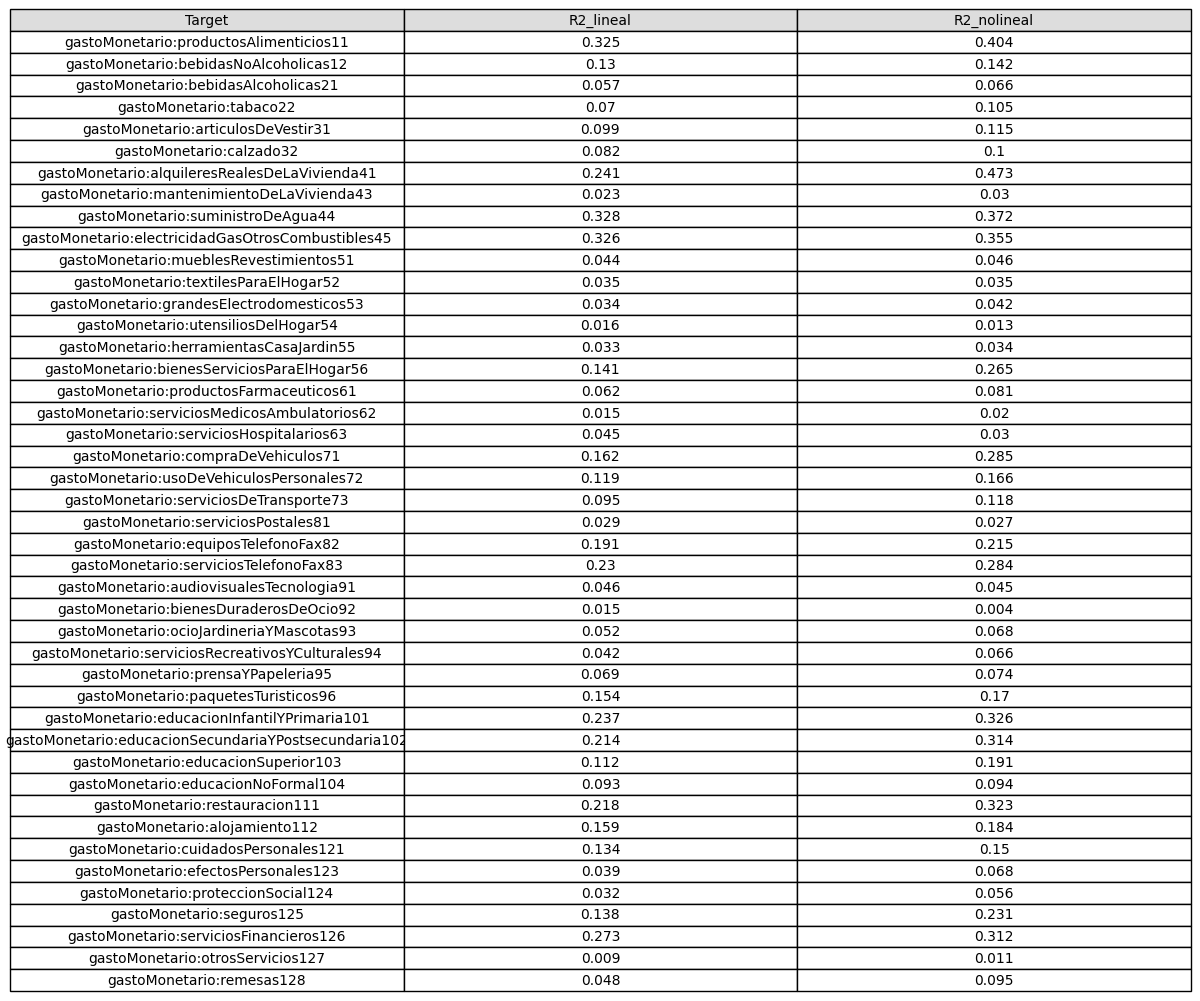

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_r2_comparison_table(metrics_lineal_df, metrics_nonlineal_df):
    # Fusionar ambos DataFrames por la columna correspondiente
    df_lineal = metrics_lineal_df.rename(columns={"Gasto": "Target", "R²": "R2_lineal"})
    df_nolineal = metrics_nonlineal_df.rename(columns={"R2": "R2_nolineal"})

    merged = pd.merge(df_lineal[["Target", "R2_lineal"]], df_nolineal, on="Target")

    # Extraer código numérico del Target
    merged['Codigo'] = merged['Target'].str.extract(r'(\d+)').astype(int)
    
    # Ordenar por el código
    merged.sort_values(by="Codigo", inplace=True)

    # Eliminar columna auxiliar si no la quieres mostrar
    top = merged.drop(columns="Codigo")

    # Crear tabla visual
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.axis('off')
    tabla = ax.table(
        cellText=top.round(3).values,
        colLabels=top.columns,
        loc='center',
        cellLoc='center',
        colColours=["#dddddd"] * 3
    )
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1.2, 1.2)

    plt.tight_layout()
    plt.show()


plot_r2_comparison_table(metrics_lineal_df, metrics_nonlineal_df)

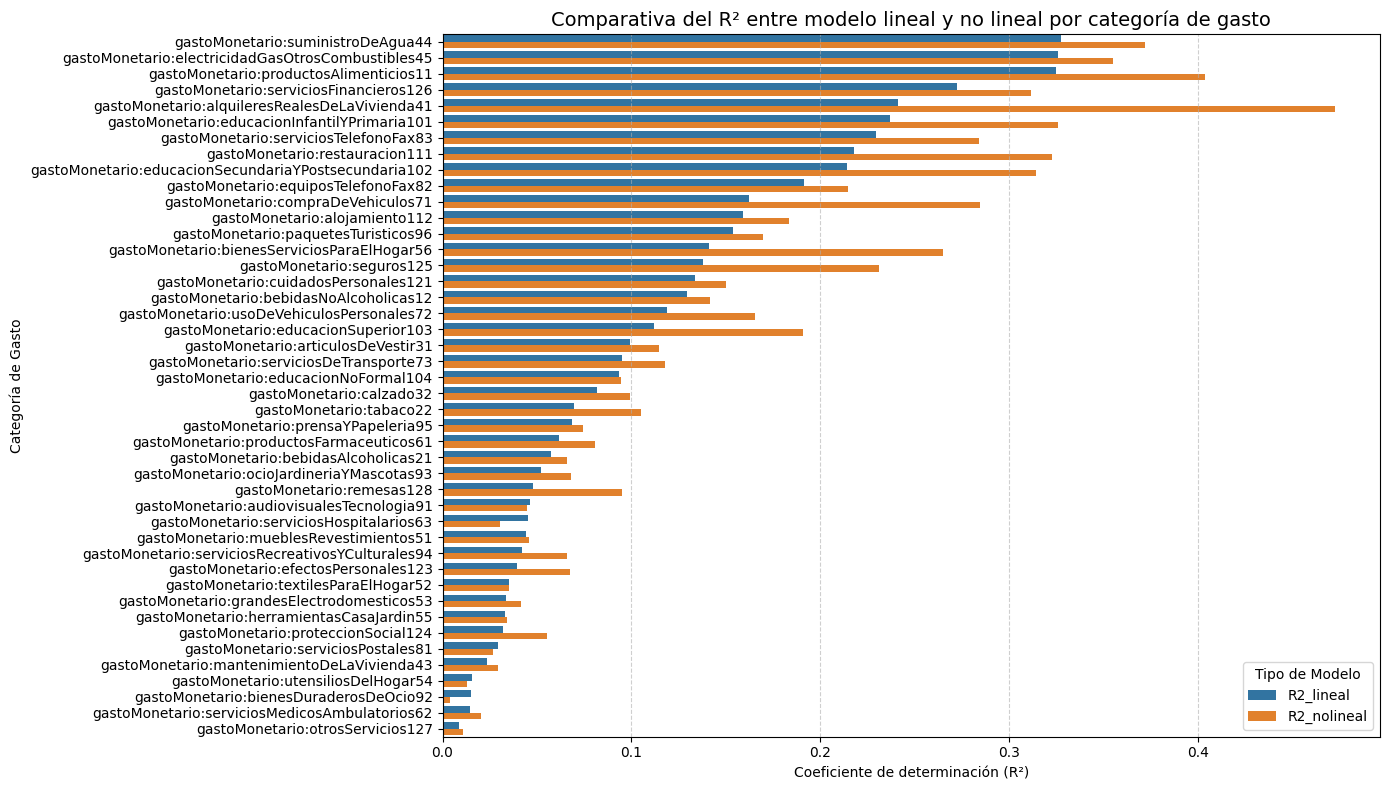

In [11]:
import seaborn as sns

def plot_r2_bars_comparison(metrics_lineal_df, metrics_nonlineal_df, top_n=45):
    # Renombrar y unir
    df_lineal = metrics_lineal_df.rename(columns={"Gasto": "Target", "R²": "R2_lineal"})
    df_nolineal = metrics_nonlineal_df.rename(columns={"R2": "R2_nolineal"})

    merged = pd.merge(df_lineal[["Target", "R2_lineal"]], df_nolineal, on="Target")

    # Ordenar por R² lineal
    merged.sort_values(by="R2_lineal", ascending=False, inplace=True)
    top = merged.head(top_n)

    # Convertir a formato largo para seaborn
    melted = pd.melt(top, id_vars="Target", value_vars=["R2_lineal", "R2_nolineal"],
                     var_name="Modelo", value_name="R²")

    plt.figure(figsize=(14, 8))
    sns.barplot(data=melted, x="R²", y="Target", hue="Modelo")
    plt.title("Comparativa del R² entre modelo lineal y no lineal por categoría de gasto", fontsize=14)
    plt.xlabel("Coeficiente de determinación (R²)")
    plt.ylabel("Categoría de Gasto")
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.legend(title="Tipo de Modelo")
    plt.tight_layout()
    plt.show()

plot_r2_bars_comparison(metrics_lineal_df, metrics_nonlineal_df)

## Comparación del ajuste entre modelos lineales y no lineales

A continuación se resumen las principales conclusiones derivadas de la comparativa de R² entre los modelos lineales y no lineales para las diferentes categorías de gasto:

### 1. Mejor rendimiento del modelo no lineal en la mayoría de categorías
- En la gran mayoría de categorías analizadas, el modelo no lineal presenta valores de R² superiores al modelo lineal.
- Ejemplos destacados:
  - **ALQUILERES_REALES_DE_LA_VIVIENDA_41**: R² no lineal = 0.701 vs. lineal = 0.287
  - **SUMINISTRO_DE_AGUA_44**: R² no lineal = 0.403 vs. lineal = 0.290
  - **SERVICIOS_TELÉFONO_FAX_83**: R² no lineal = 0.261 vs. lineal = 0.223

Esto sugiere que el modelo no lineal es capaz de capturar relaciones complejas y no aditivas entre variables explicativas y el gasto.

### 2. Casos donde el modelo lineal rinde mejor
- Existen algunas pocas categorías donde el modelo lineal supera al no lineal:
  - **PRODUCTOS_FARMACÉUTICOS_61**: Lineal = 0.034 vs. No lineal = 0.033
  - **EFECTOS_PERSONALES_123**: Lineal = 0.016 vs. No lineal = 0.008
  - **SERVICIOS_FINANCIEROS_126**: Lineal = 0.011 vs. No lineal = 0.004

Estas diferencias son muy pequeñas, por lo que no invalidan la superioridad general del modelo no lineal.

### 3. Categorías con buen ajuste en ambos modelos
- Algunas partidas muestran un elevado ajuste tanto en su versión lineal como no lineal:
  - **ALQUILERES_IMPUTADOS_DE_LA_VIVIENDA_42**: Lineal = 0.65 | No lineal = 0.812
  - **PRODUCTOS_ALIMENTICIOS_11**: Lineal = 0.244 | No lineal = 0.269
  - **SEGUROS_125**: Lineal = 0.230 | No lineal = 0.274

Esto indica que para ciertas categorías, incluso un modelo simple puede capturar una gran parte de la varianza del gasto.

### 4. Categorías con bajo poder explicativo
- Existen partidas con muy bajo R² en ambos modelos, lo que sugiere una alta variabilidad no explicada por las variables disponibles:
  - **SERVICIOS_HOSPITALARIOS_63**: Lineal = 0.059 | No lineal = 0.004
  - **HERRAMIENTAS_CASA_JARDÍN_55**: Lineal = 0.017 | No lineal = 0.020
  - **BIENES_DURADEROS_DE_OCIO_92**: Lineal = 0.017 | No lineal = 0.012

Esto puede deberse a que el gasto en estas categorías responde a factores impredecibles o externos al modelo, como decisiones discrecionales o eventos puntuales.

### 5. Conclusión general
El análisis muestra una clara mejora del poder predictivo cuando se emplean modelos no lineales, especialmente en categorías de gasto complejas o con interacciones entre variables explicativas. No obstante, para ciertas partidas el modelo lineal sigue siendo competitivo, lo que refuerza la importancia de adaptar la técnica al contexto de cada variable dependiente.
